In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
np.set_printoptions(threshold =  np.nan)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [3]:
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding = 'latin-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [5]:
data.shape

(170350, 135)

## Part 3 Predict 1993 Bombings

The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, we will focus analysis on attacktype1 bombings (category 3, as per the codebook)

For this section, you should determine a methodology that allows you to best fill in the missing values. Perhaps you want to consider hemispheres to be separate models, for example. (That's the only hint you'll receive - and even that hint is not an optimal option.)

Once you've created your methodology and imputed the number of bombings in 1993, you should feel free to apply your methodology to OTHER attack categories. (Bonus opportunity: turn your method into a pipeline. Use that pipeline to fill in other missing attack values.)

What happened in 1993?

 - Bill Clinton became President
 - Islamic Fundamentalists bomb WTC
 - Bombs explode in Bombay India
 - 7.8 Earthquake Hokkaido, Japan
 - Earthquake on Killari, Maharashtra, India
 - U.S./Russia START II signed 
 - U.S. WACO seige
 - Bosnia and Herzegovina fighting between muslims and croats
 - Formally established European Union
 - Earthquake Flores, Indonesia
 - IRA explodes massive bomb in city of london
 - NAFTA
 - Israel and PLO peace agreement
 - First Beanie Babies
 - Slovakia gains independence when Czech divides into czech republic and slovakia
 

In [202]:
data.head(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


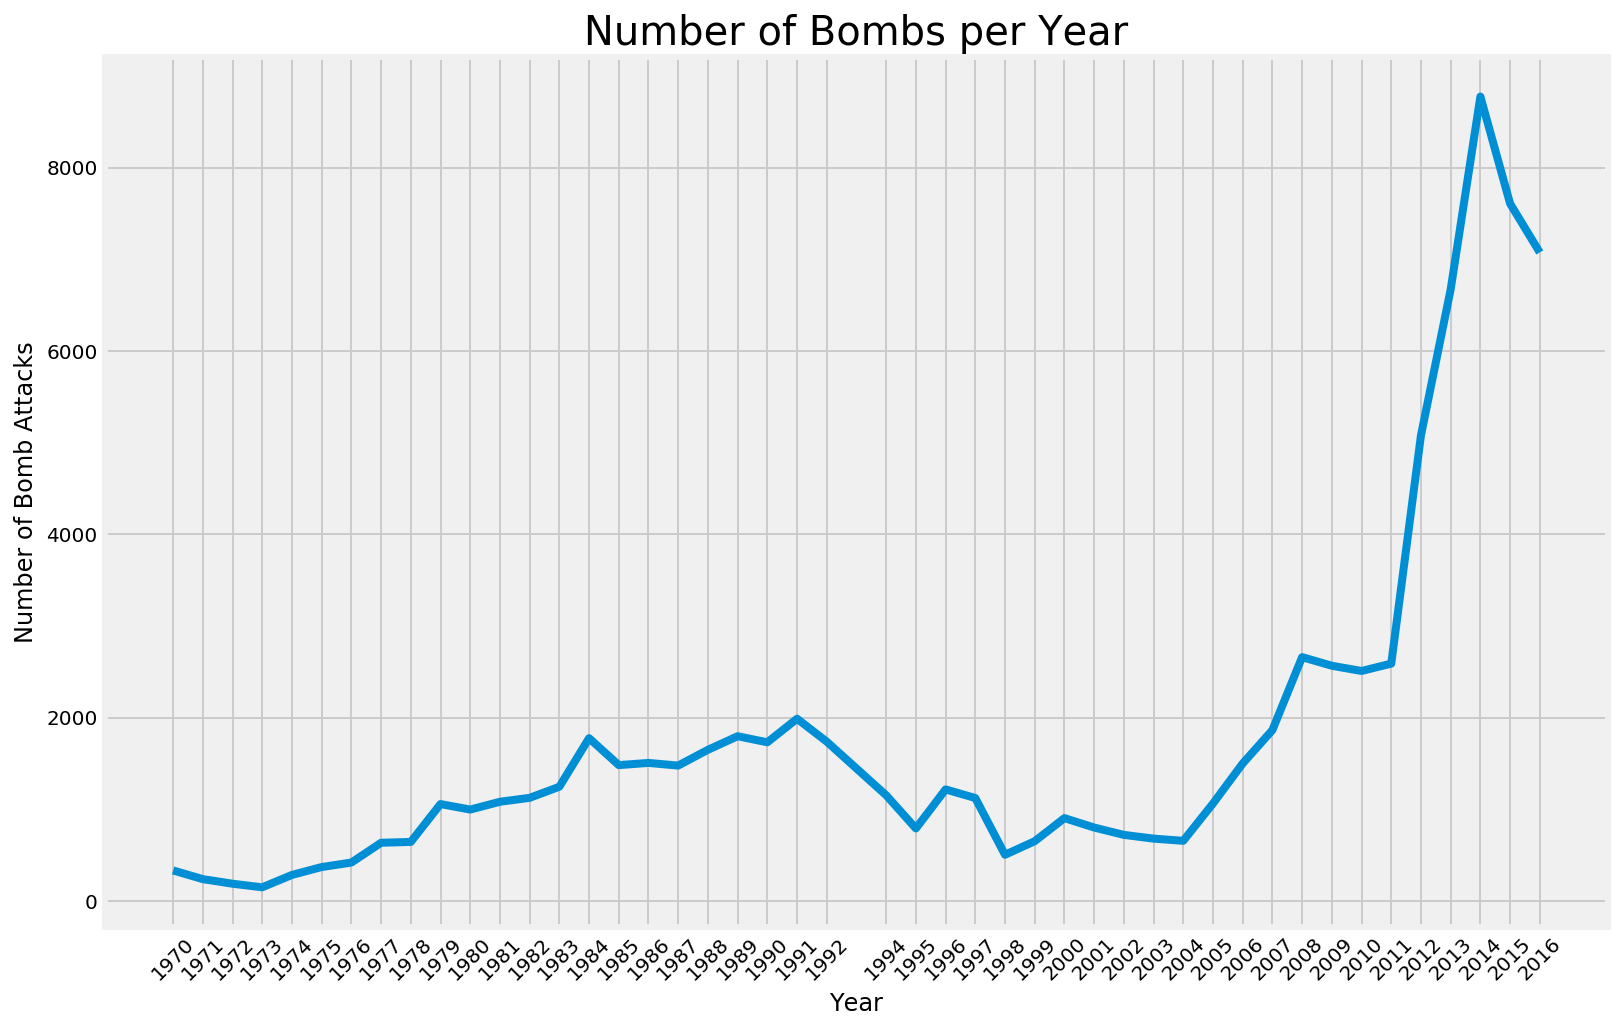

In [10]:
df_bombing = df[df['attacktype1'] == 3].reset_index(drop = True)
plt.figure(figsize = (12, 8))
df_bombing.groupby('iyear').count().attacktype1.plot(kind='line')
plt.title('Number of Bombs per Year', fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Number of Bomb Attacks')
plt.xticks(df.iyear.unique(), rotation = 45);

In [6]:
cols = ['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'attacktype1', 'attacktype1_txt',\
       'nkill', 'nwound']

df = data[cols]

df.head(1)

,iyear,imonth,iday,country,country_txt,region,attacktype1,attacktype1_txt,nkill,nwound
0,1970,7,2,58,Dominican Republic,2,1,Assassination,1.0,0.0


#### Get only data before 1997 because that's when data changed hands so thinking about data integrity

In [7]:
df_97 = df.query("iyear < 1998").reset_index(drop = True)

In [8]:
sorted(df_97.country_txt.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany (GDR)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Gu

In [9]:
len(df_97.country_txt.unique())

192

### Got the Appendix data from https://github.com/fivethirtyeight/data/tree/master/terrorism

In [10]:
df_93 = pd.read_csv('country_stats_1993_appendix2.csv')

df_93.shape

In [12]:
df_93.dropna(inplace = True)

In [13]:
df_93['iyear'] = 1993

In [16]:
df_93['Percent'] = df_93.Percent.apply(lambda x: float(x[:-1]))

#### Checking which countries were not part of each dataset

In [27]:
countries_not_93 = [cont for cont in df_97.country_txt.unique() if cont not in df_93.Country.unique()]
countries_not_97 = [cont for cont in df_93.Country.unique() if cont not in df_97.country_txt.unique()]

In [15]:
#some countries were the same but under different name/spelling
df_93.Country.replace({'Bosnia_Herzegovina': 'Bosnia-Herzegovina', 'Congo (Brazzaville)': 'Republic of the Congo', \
                      'Congo (Kinshasa)': 'Democratic Republic of the Congo', 'Guinea_Bissau':'Guinea-Bissau', \
                      'Myanmar (Burma)': 'Myanmar'}, inplace = True)

#### Combining countries

In [17]:
df_93[df_93['Country'] == 'Corsica']

,Country,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear
28,Corsica,67.0,1.35,1.0,2.0,0.0,0.0,1993


In [18]:
df_93[df_93['Country'] == 'France']

,Country,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear
42,France,52.0,1.05,5.0,9.0,0.0,0.0,1993


In [19]:
df_93[df_93['Country'] == 'France'] = ['France', 119.0, 2.40, 6.0, 11.0, 0, 0, 1993]

In [20]:
df_93[df_93['Country'] == 'Northern Ireland']

,Country,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear
85,Northern Ireland,165.0,3.33,73.0,175.0,0.0,0.0,1993


In [21]:
df_93[df_93['Country'] == 'United Kingdom']

,Country,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear
119,United Kingdom,59.0,1.19,3.0,133.0,0.0,0.0,1993


In [22]:
df_93[df_93['Country'] == 'United Kingdom'] = ['United Kingdom', 224.0, 4.52, 76.0, 308.0, 0, 0, 1993]

In [23]:
df_93[df_93['Country'] == 'Netherlands Antilles']

,Country,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear
80,Netherlands Antilles,2.0,0.04,0.0,0.0,0.0,0.0,1993


In [24]:
df_93[df_93['Country'] == 'Netherlands']

,Country,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear
79,Netherlands,3.0,0.06,0.0,0.0,0.0,0.0,1993


In [25]:
df_93[df_93['Country'] == 'Netherlands'] = ['Netherlands', 5.0, .10, 0, 0, 0, 0, 1993]

In [26]:
df_93 = df_93[(df_93['Country'] != 'Corsica') & (df_93['Country'] != 'Netherlands Antilles') & (df_93['Country'] != 'Northern Ireland')].reset_index(drop = True)

In [28]:
countries_not_97

['Guinea-Bissau']

In [29]:
countries_not_93

['East Germany (GDR)',
 'West Germany (FRG)',
 'South Yemen',
 'West Bank and Gaza Strip',
 'Czechoslovakia',
 'South Vietnam',
 'Morocco',
 'Zaire',
 'Botswana',
 'North Yemen',
 'Andorra',
 'Syria',
 'United Arab Emirates',
 'Namibia',
 'Bahamas',
 'Barbados',
 "People's Republic of the Congo",
 'Saudi Arabia',
 'Malta',
 'Rhodesia',
 'Soviet Union',
 'Western Sahara',
 'Guyana',
 'Tunisia',
 'Lesotho',
 'Gabon',
 'Libya',
 'Bahrain',
 'Zimbabwe',
 'Grenada',
 'New Hebrides',
 'Martinique',
 'Vatican City',
 'Central African Republic',
 'Seychelles',
 'Dominica',
 'Qatar',
 'Bulgaria',
 'Luxembourg',
 'Iceland',
 'French Guiana',
 'Falkland Islands',
 'Burkina Faso',
 'New Caledonia',
 'Finland',
 'Fiji',
 'Ghana',
 'Mauritius',
 'Madagascar',
 'Ukraine',
 'Moldova',
 'Ivory Coast',
 'Kazakhstan',
 'Equatorial Guinea',
 'Uzbekistan',
 'Brunei',
 'Benin',
 'Slovak Republic',
 'Macedonia',
 'Wallis and Futuna',
 'Slovenia',
 'Gambia',
 'North Korea',
 'Eritrea',
 'St. Kitts and Nevis',

In [32]:
new_df_93 = df_93[df_93['Country'] != 'Guinea-Bissau']

#### Assigning the regions to coutnries in 93

In [33]:
regions = df_97[['country_txt', 'region']].sort_values(by = 'country_txt').groupby('country_txt').max().reset_index()

In [34]:
combined_93 = pd.merge(new_df_93, regions, how = 'left', left_on = 'Country', right_on = 'country_txt')
combined_93.drop('Country', axis = 1, inplace = True)

In [35]:
combined_93

,Number of Incidents,Percent,Number Killed,Number Injured,Number US Killed,Number US Injured,iyear,country_txt,region
0,20.0,0.40,65.0,50.0,0.0,1.0,1993,Afghanistan,6
1,2.0,0.04,0.0,2.0,0.0,0.0,1993,Albania,9
2,311.0,6.28,602.0,126.0,0.0,0.0,1993,Algeria,10
3,34.0,0.69,373.0,111.0,0.0,0.0,1993,Angola,11
4,1.0,0.02,0.0,0.0,0.0,0.0,1993,Antigua and Barbuda,2
5,15.0,0.30,2.0,1.0,0.0,0.0,1993,Argentina,3
6,6.0,0.12,5.0,17.0,0.0,0.0,1993,Armenia,7
7,2.0,0.04,0.0,0.0,0.0,0.0,1993,Australia,12
8,9.0,0.18,0.0,5.0,0.0,0.0,1993,Austria,8
9,4.0,0.08,16.0,0.0,0.0,0.0,1993,Azerbaijan,7


In [36]:
combined_93.drop(['Percent', 'Number US Killed', 'Number US Injured'], axis = 1, inplace = True)

In [37]:
df_97.dropna(inplace = True)

#### Need a dataframe for only bombs

In [38]:
df_bomb_97 = df_97.query("attacktype1_txt == 'Bombing/Explosion'")

In [39]:
df_97.drop(['imonth', 'iday'], axis = 1, inplace = True)

#### Breaking the data into regions

In [40]:
cont = ['north_america', 'central_america', 'south_america', 'east_asia', 'southeast_asia', 'south_asia', 'central_asia', \
'western_europe', 'eastern_europe', 'middle_east', 'sub_africa', 'australasia']

In [41]:
for i, j in zip(np.arange(1,13), cont):
    locals()['terror_{}'.format(j)] = df_97[df_97['region'] == i]

In [42]:
for i, j in zip(np.arange(1,13), cont):
    locals()['bombing_{}'.format(j)] = df_97[(df_97['region'] == i) & (df_97['attacktype1_txt'] == 'Bombing/Explosion')].\
    groupby('iyear').agg({'attacktype1': 'count'}).rename(columns = {'attacktype1':'bombing'}).reset_index()

#### Aggregating the things that I want

In [44]:
north_america_group = terror_north_america.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
central_america_group = terror_central_america.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
south_america_group = terror_south_america.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
east_asia_group = terror_east_asia.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
southeast_asia_group = terror_southeast_asia.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
south_asia_group = terror_south_asia.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
central_asia_group = terror_central_asia.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
western_europe_group = terror_western_europe.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
eastern_europe_group = terror_eastern_europe.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
middle_east_group = terror_middle_east.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
sub_africa_group = terror_sub_africa.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()
australasia_group = terror_australasia.groupby('iyear').agg({'attacktype1' : 'count', 'nkill': sum, 'nwound': sum}).reset_index()

In [45]:
north_america_final = pd.merge(north_america_group, bombing_north_america, how = 'left', on = 'iyear')
central_america_final = pd.merge(central_america_group, bombing_north_america, how = 'left', on = 'iyear')
south_america_final = pd.merge(south_america_group, bombing_north_america, how = 'left', on = 'iyear')
east_asia_final = pd.merge(east_asia_group, bombing_north_america, how = 'left', on = 'iyear')
southeast_asia_final = pd.merge(southeast_asia_group, bombing_north_america, how = 'left', on = 'iyear')
south_asia_final = pd.merge(south_asia_group, bombing_north_america, how = 'left', on = 'iyear')
central_asia_final = pd.merge(central_asia_group, bombing_north_america, how = 'left', on = 'iyear')
western_europe_final = pd.merge(western_europe_group, bombing_north_america, how = 'left', on = 'iyear')
eastern_europe_final = pd.merge(eastern_europe_group, bombing_north_america, how = 'left', on = 'iyear')
middle_east_final = pd.merge(middle_east_group, bombing_north_america, how = 'left', on = 'iyear')
sub_africa_final = pd.merge(sub_africa_group, bombing_north_america, how = 'left', on = 'iyear')
australasia_final = pd.merge(australasia_group, bombing_north_america, how = 'left', on = 'iyear')

In [47]:
north_america_final

,iyear,attacktype1,nkill,nwound,bombing
0,1970,470,34.0,160.0,276
1,1971,243,20.0,55.0,139
2,1972,67,11.0,42.0,38
3,1973,63,46.0,33.0,21
4,1974,101,18.0,54.0,70
5,1975,142,32.0,163.0,124
6,1976,112,30.0,46.0,73
7,1977,138,14.0,31.0,87
8,1978,102,15.0,24.0,60
9,1979,76,23.0,58.0,44


In [48]:
combined_93[combined_93['region'] == 1]

,Number of Incidents,Number Killed,Number Injured,iyear,country_txt,region
20,7.0,0.0,0.0,1993,Canada,1
73,17.0,47.0,22.0,1993,Mexico,1
116,28.0,21.0,1066.0,1993,United States,1


In [49]:
total_df = pd.concat([north_america_final, central_america_final, south_america_final, east_asia_final, southeast_asia_final,\
                     south_asia_final, central_asia_final, western_europe_final, eastern_europe_final, middle_east_final,\
                     sub_africa_final, australasia_final]).reset_index(drop = True)
total_df

,iyear,attacktype1,nkill,nwound,bombing
0,1970,470,34.0,160.0,276
1,1971,243,20.0,55.0,139
2,1972,67,11.0,42.0,38
3,1973,63,46.0,33.0,21
4,1974,101,18.0,54.0,70
5,1975,142,32.0,163.0,124
6,1976,112,30.0,46.0,73
7,1977,138,14.0,31.0,87
8,1978,102,15.0,24.0,60
9,1979,76,23.0,58.0,44


In [50]:
final_93 =combined_93.groupby('region').agg({'Number of Incidents' : sum, 'Number Killed': sum, 'Number Injured': sum}).\
rename(columns = {'Number of Incidents': 'attacktype1', 'Number Killed': 'nkill', 'Number Injured':'nwound'})

In [51]:
final_93['iyear'] = 1993

### North America

In [54]:
import pymc3 as pm

In [55]:
total_df.bombing.var()

3005.8464984002844

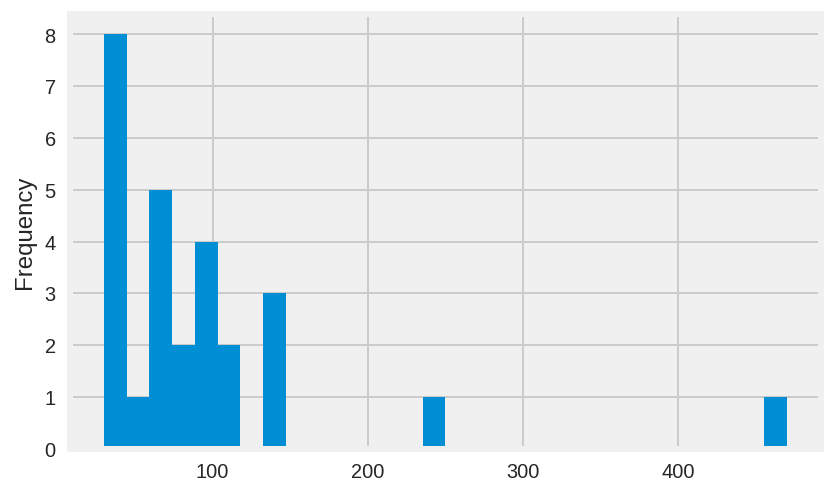

In [56]:
north_america_final.attacktype1.plot(kind = 'hist', bins = 30);

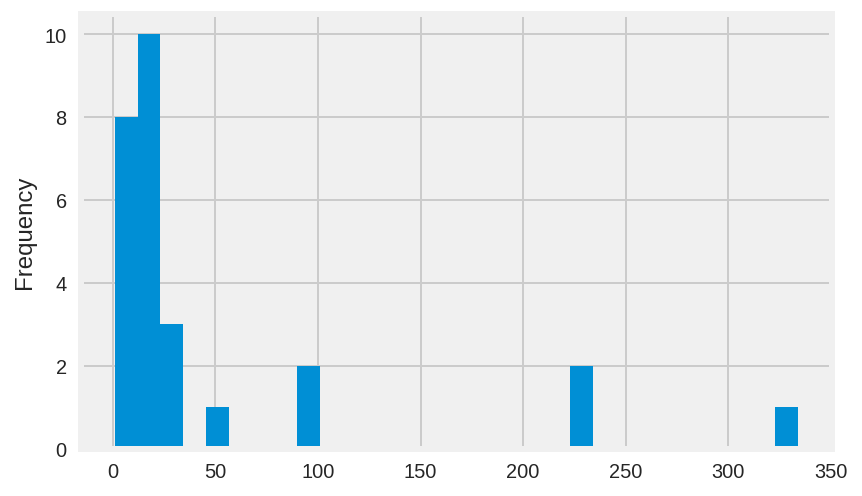

In [57]:
north_america_final.nkill.plot(kind = 'hist', bins = 30);

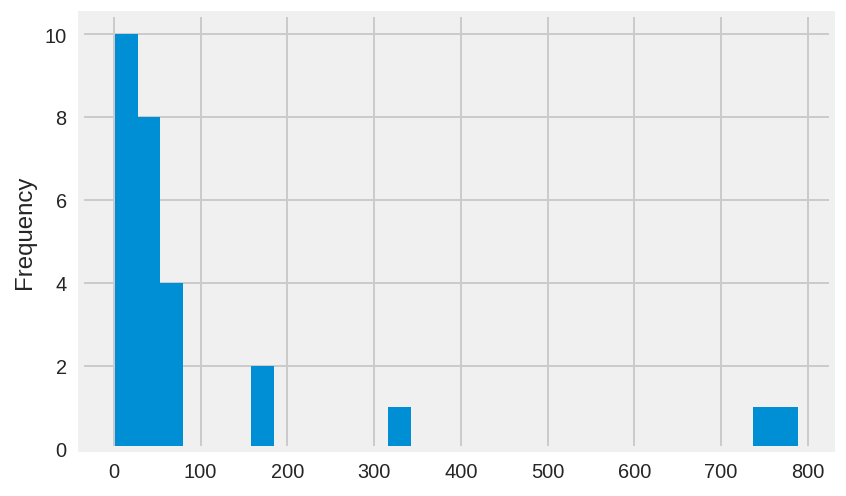

In [58]:
north_america_final.nwound.plot(kind = 'hist', bins = 30);

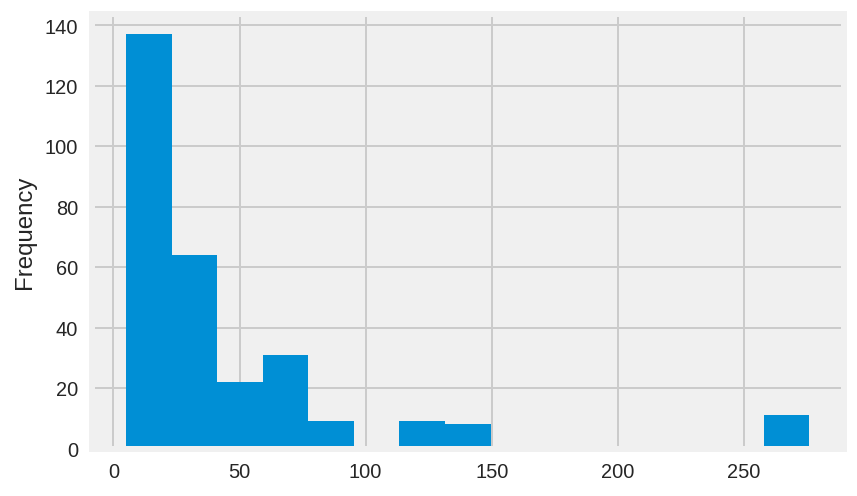

In [59]:
total_df.bombing.plot(kind = 'hist', bins = 15);

In [60]:
with pm.Model() as north_america_reg:
    bombing_std = pm.Uniform('north_america_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('north_america_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + north_america_final.iyear.values * iyear_beta +\
                                          north_america_final.attacktype1.values * attacktype1_beta + \
                                         north_america_final.nkill.values * nkill_beta +\
                                         north_america_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = north_america_final.bombing.values)
    

In [61]:
with north_america_reg:
    step = pm.NUTS()
    north_america_start = pm.find_MAP()
    trace_north_america = pm.sample(50000, step=step, start=north_america_start, njobs=4)

logp = -163.89, ||grad|| = 8.492: 100%|██████████| 49/49 [00:00<00:00, 1755.94it/s]           
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, north_america_intercept, north_america_error_std_interval__]
100%|██████████| 50500/50500 [13:35<00:00, 61.94it/s]
There were 71 divergences after tuning. Increase `target_accept` or reparameterize.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
There were 175 divergences after tuning. Increase `target_accept` or reparameterize.
There were 28 divergences after tuning. Increase `target_accept` or reparameterize.


In [62]:
north_america_start

{'attacktype1_beta': array(0.6046261666398703),
 'iyear_beta': array(-0.0014338952979409442),
 'nkill_beta': array(-0.10572365886786407),
 'north_america_error_std': array(16.896133297074396),
 'north_america_error_std_interval__': array(-5.175598678062895),
 'north_america_intercept': array(3.045316151589574e-05),
 'nwound_beta': array(-0.01383207897539098)}

In [63]:
north_america_array = float(north_america_start['north_america_intercept']) + north_america_final.iyear.values * float(north_america_start['iyear_beta']) + \
                                         north_america_final.attacktype1.values * float(north_america_start['attacktype1_beta']) + \
                                         north_america_final.nkill.values * float(north_america_start['nkill_beta']) + \
                                         north_america_final.nwound.values * float(north_america_start['nwound_beta'])

In [64]:
north_america_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
north_america_df_bombing['year'] = north_america_final.iyear
north_america_df_bombing['map_bombing'] = north_america_array
north_america_df_bombing.tail()

,year,map_bombing
22,1992,20.990770
23,1994,46.564769
24,1995,18.906336
25,1996,49.312143
26,1997,54.635244


In [65]:
north_america_bombing_93 = (north_america_df_bombing.query("year == 1992")['map_bombing'].values + north_america_df_bombing.query("year == 1994")['map_bombing'].values)/2

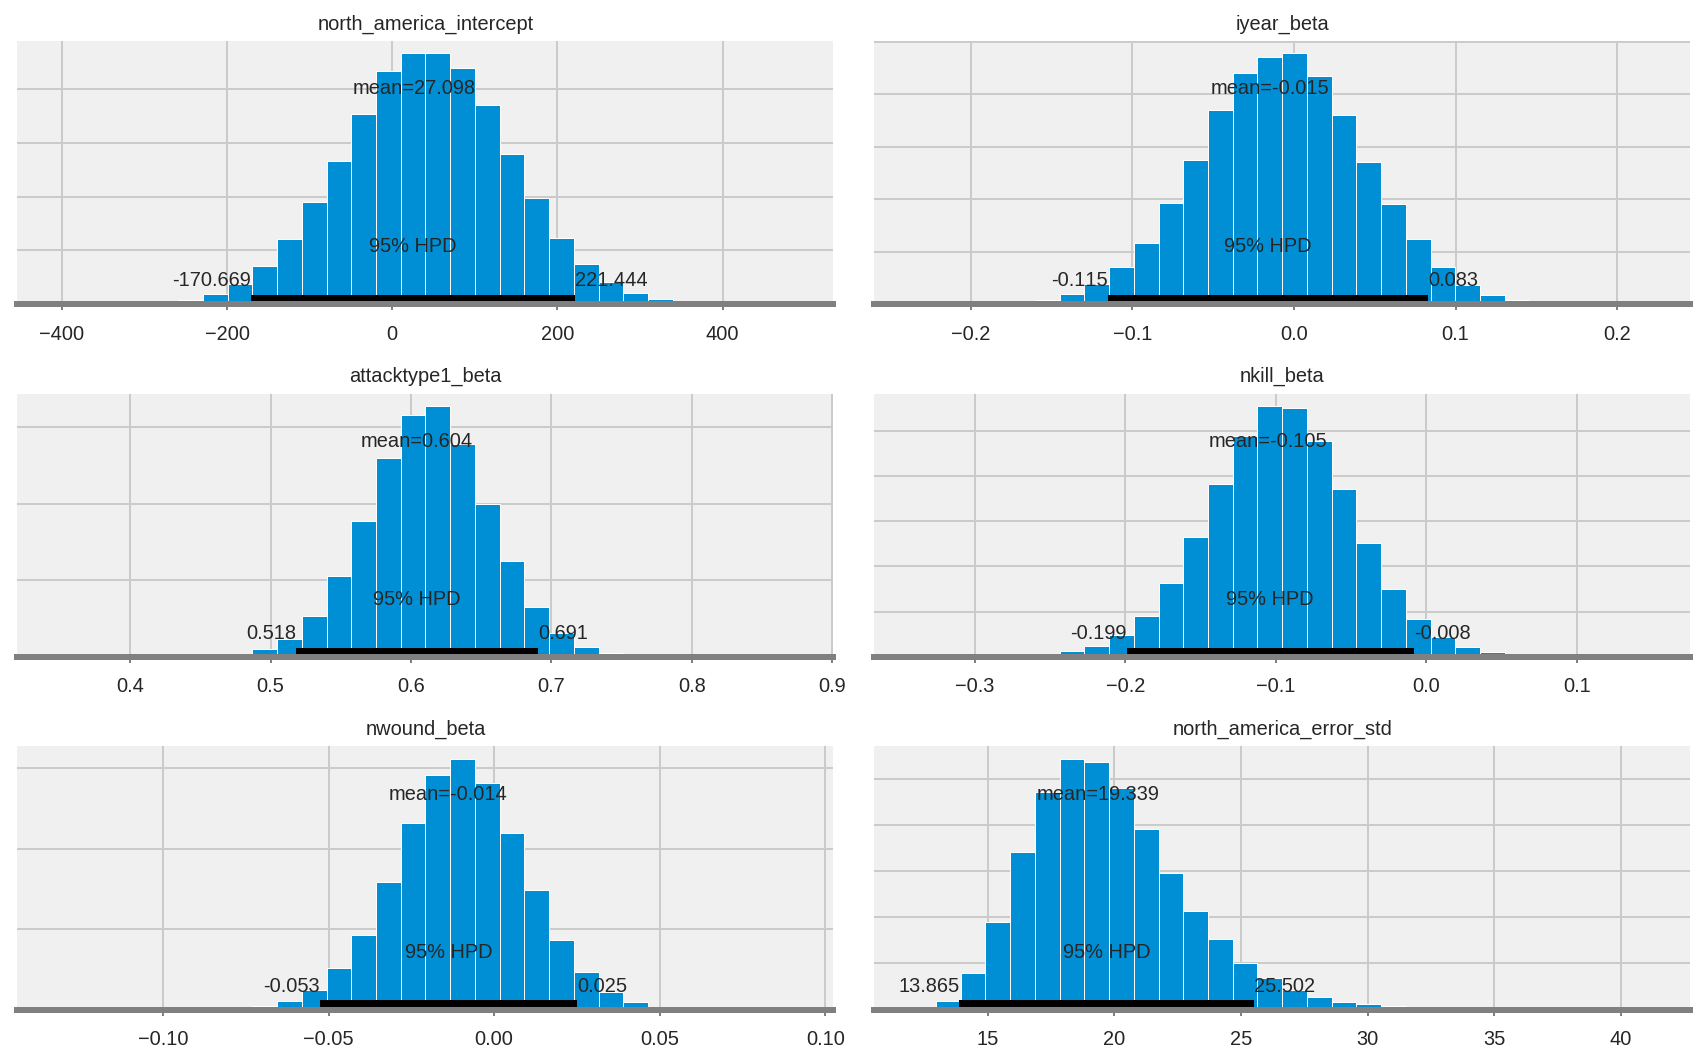

In [66]:
pm.plot_posterior(trace_north_america);

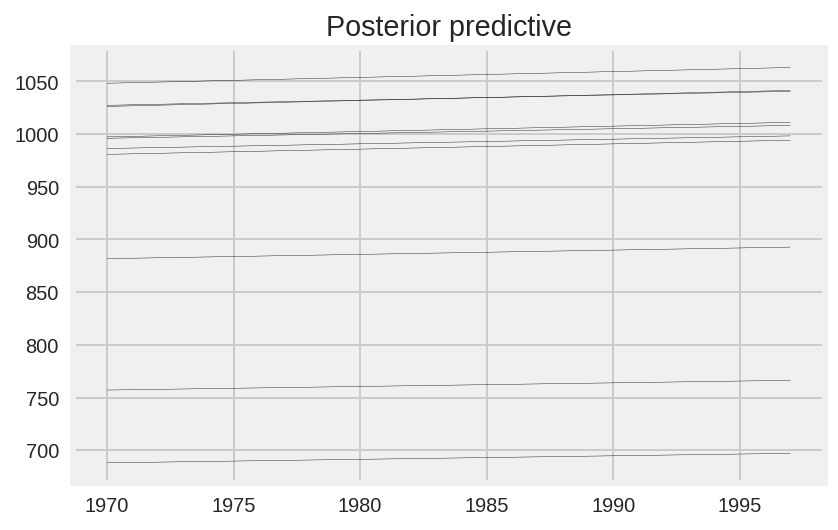

In [67]:
pm.plot_posterior_predictive_glm(trace_north_america, samples = 10, lm = lambda x, sample: \
                                float(sample['north_america_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = north_america_final.iyear.values,\
                                label = 'posterior predictive regression lines');

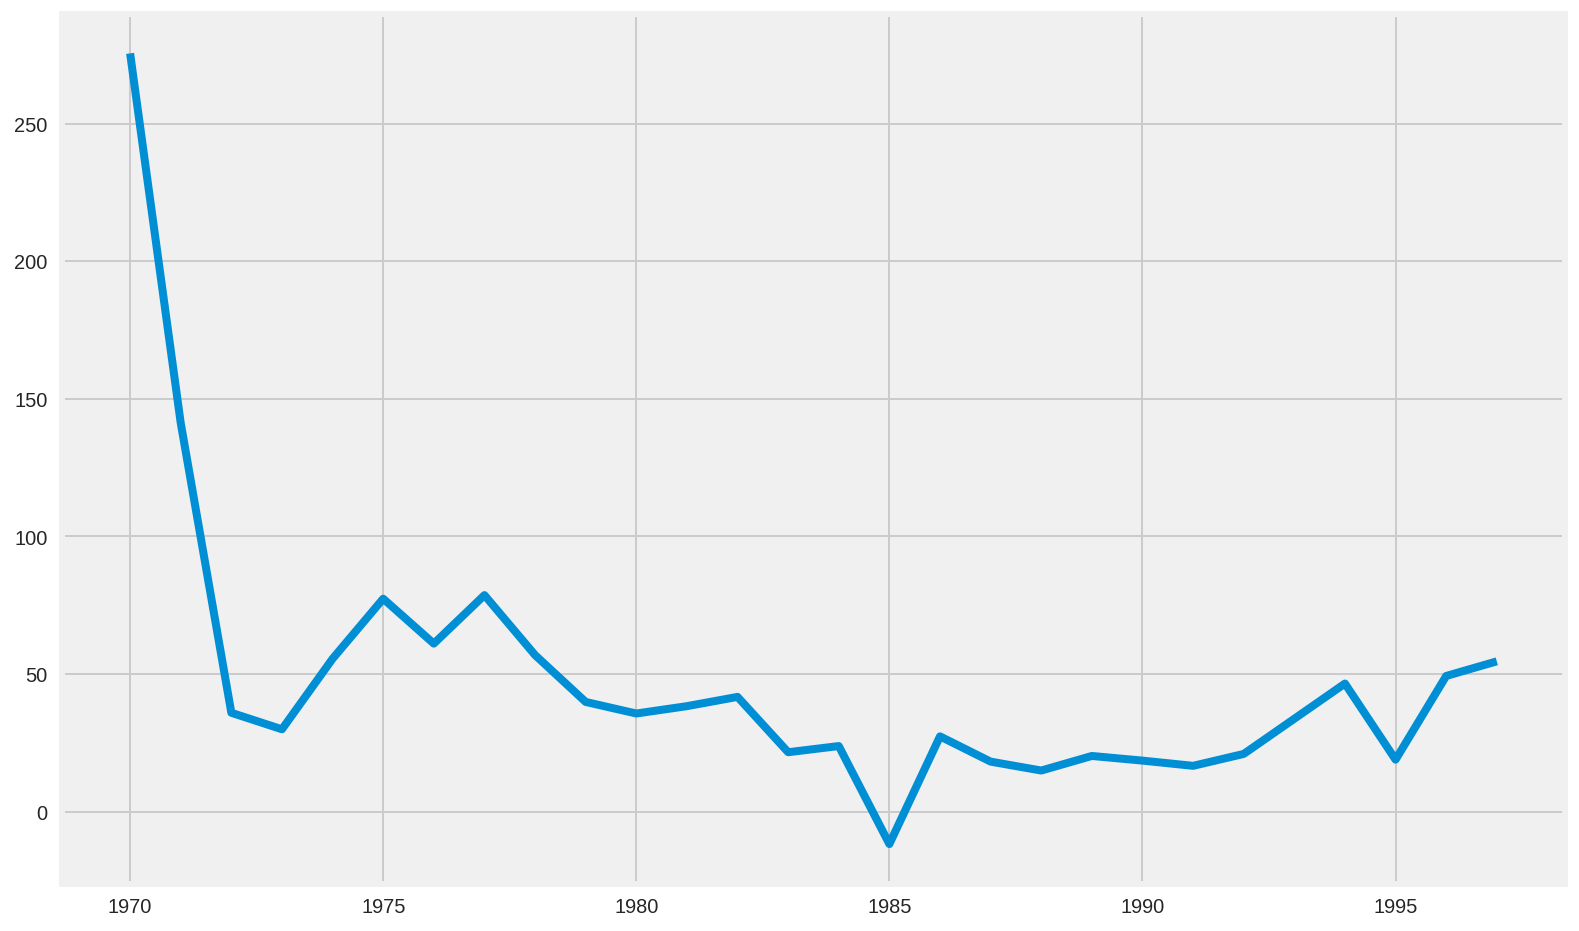

In [68]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(north_america_final.iyear.values, float(north_america_start['north_america_intercept']) + \
                                         north_america_final.iyear.values * float(north_america_start['iyear_beta']) + \
                                         north_america_final.attacktype1.values * float(north_america_start['attacktype1_beta']) + \
                                         north_america_final.nkill.values * float(north_america_start['nkill_beta']) + \
                                         north_america_final.nwound.values * float(north_america_start['nwound_beta']));

### Central America

In [69]:
with pm.Model() as central_america_reg:
    bombing_std = pm.Uniform('central_america_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('central_america_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + central_america_final.iyear.values * iyear_beta +\
                                          central_america_final.attacktype1.values * attacktype1_beta + \
                                         central_america_final.nkill.values * nkill_beta +\
                                         central_america_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = central_america_final.bombing.values)
    

In [70]:
with central_america_reg:
    step = pm.NUTS()
    start_central_america = pm.find_MAP()
    trace_central_america = pm.sample(50000, step=step, start=start_central_america, njobs=4)

logp = -192.4, ||grad|| = 5.6383: 100%|██████████| 46/46 [00:00<00:00, 1731.63it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, central_america_intercept, central_america_error_std_interval__]
100%|██████████| 50500/50500 [07:12<00:00, 116.85it/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.


In [71]:
start_central_america

{'attacktype1_beta': array(-0.06740111231253272),
 'central_america_error_std': array(48.57736136479024),
 'central_america_error_std_interval__': array(-4.108865984364533),
 'central_america_intercept': array(3.174803469736549e-05),
 'iyear_beta': array(0.03930758498687203),
 'nkill_beta': array(0.007403754457325554),
 'nwound_beta': array(-0.0531377488763485)}

In [72]:
central_america_array = float(start_central_america['central_america_intercept']) + central_america_final.iyear.values * float(start_central_america['iyear_beta']) + \
                                         central_america_final.attacktype1.values * float(start_central_america['attacktype1_beta']) + \
                                         central_america_final.nkill.values * float(start_central_america['nkill_beta']) + \
                                         central_america_final.nwound.values * float(start_central_america['nwound_beta'])

In [73]:
central_america_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
central_america_df_bombing['year'] = central_america_final.iyear
central_america_df_bombing['map_bombing'] = central_america_array
central_america_df_bombing.tail()

,year,map_bombing
22,1992,56.261137
23,1994,58.150928
24,1995,62.168655
25,1996,64.011101
26,1997,63.978227


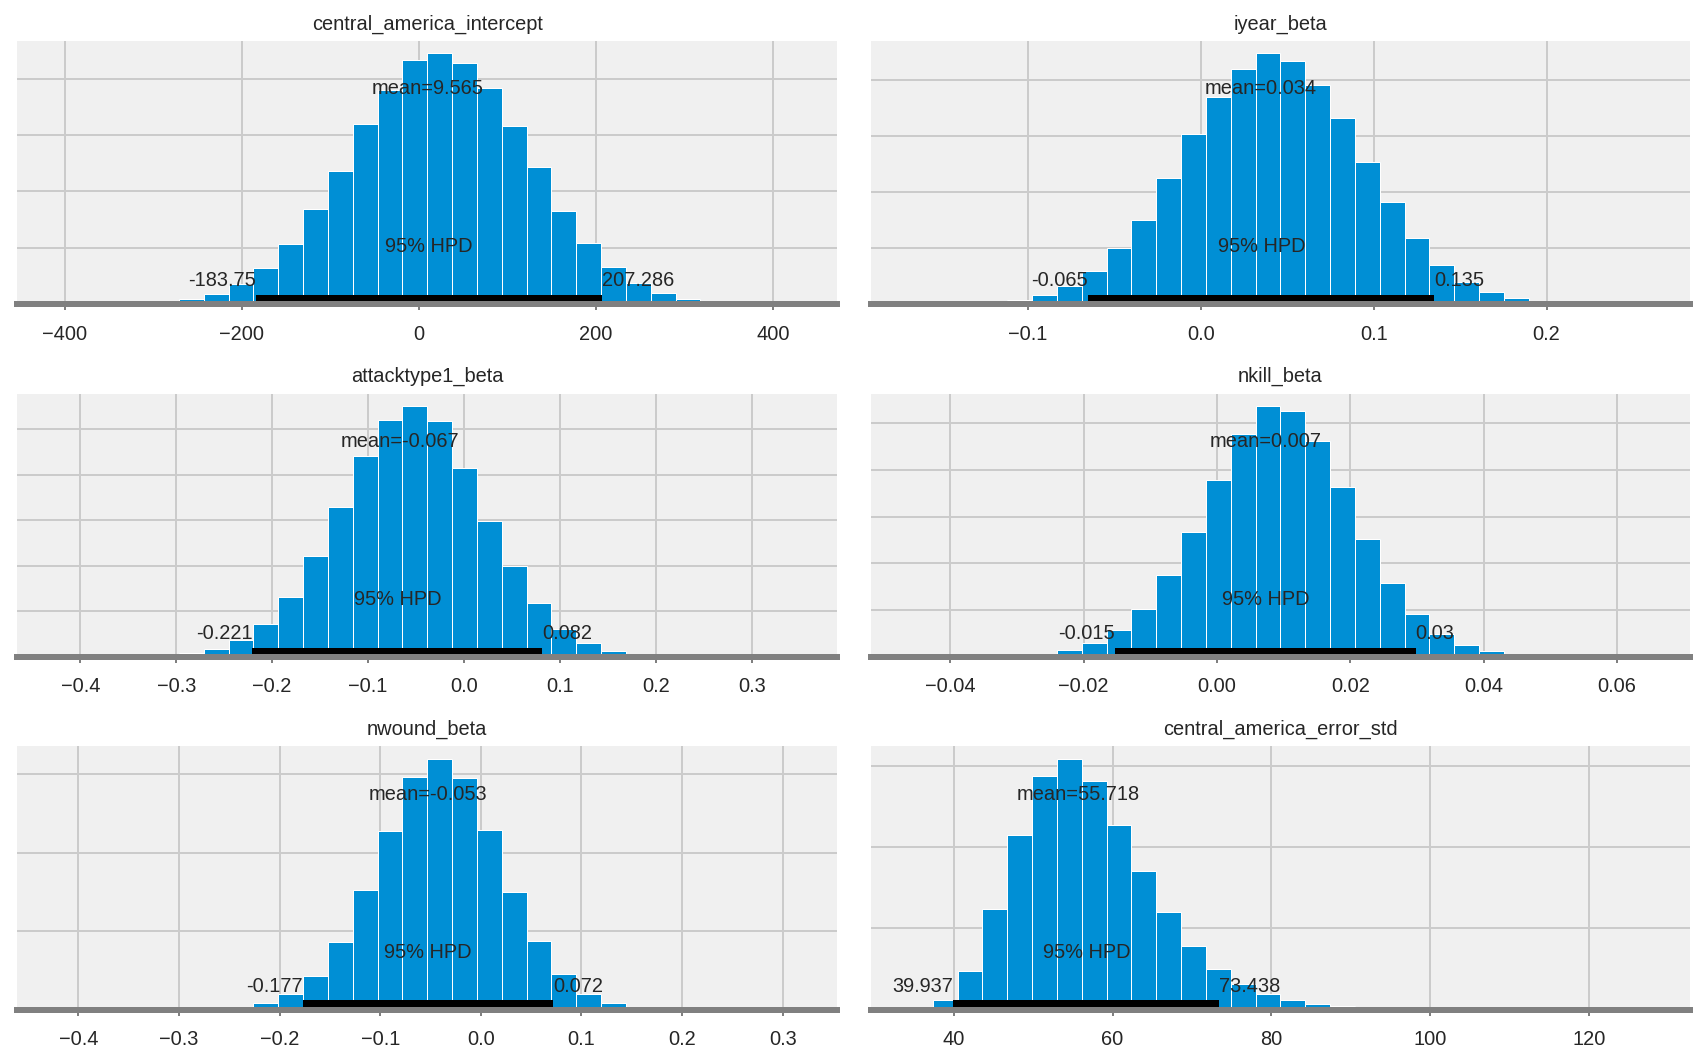

In [74]:
pm.plot_posterior(trace_central_america);

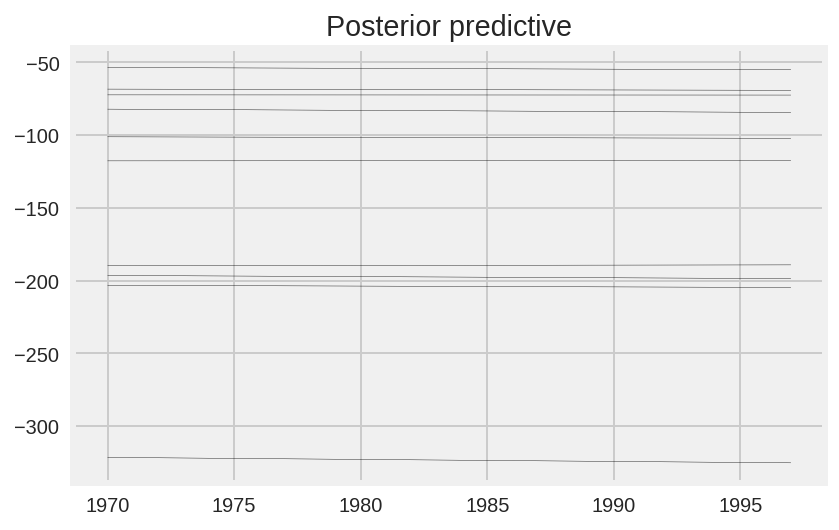

In [75]:
pm.plot_posterior_predictive_glm(trace_central_america, samples = 10, lm = lambda x, sample: \
                                float(sample['central_america_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta'])  + \
                                         x * float(sample['nwound_beta']), eval = central_america_final.iyear.values,\
                                label = 'posterior predictive regression lines');

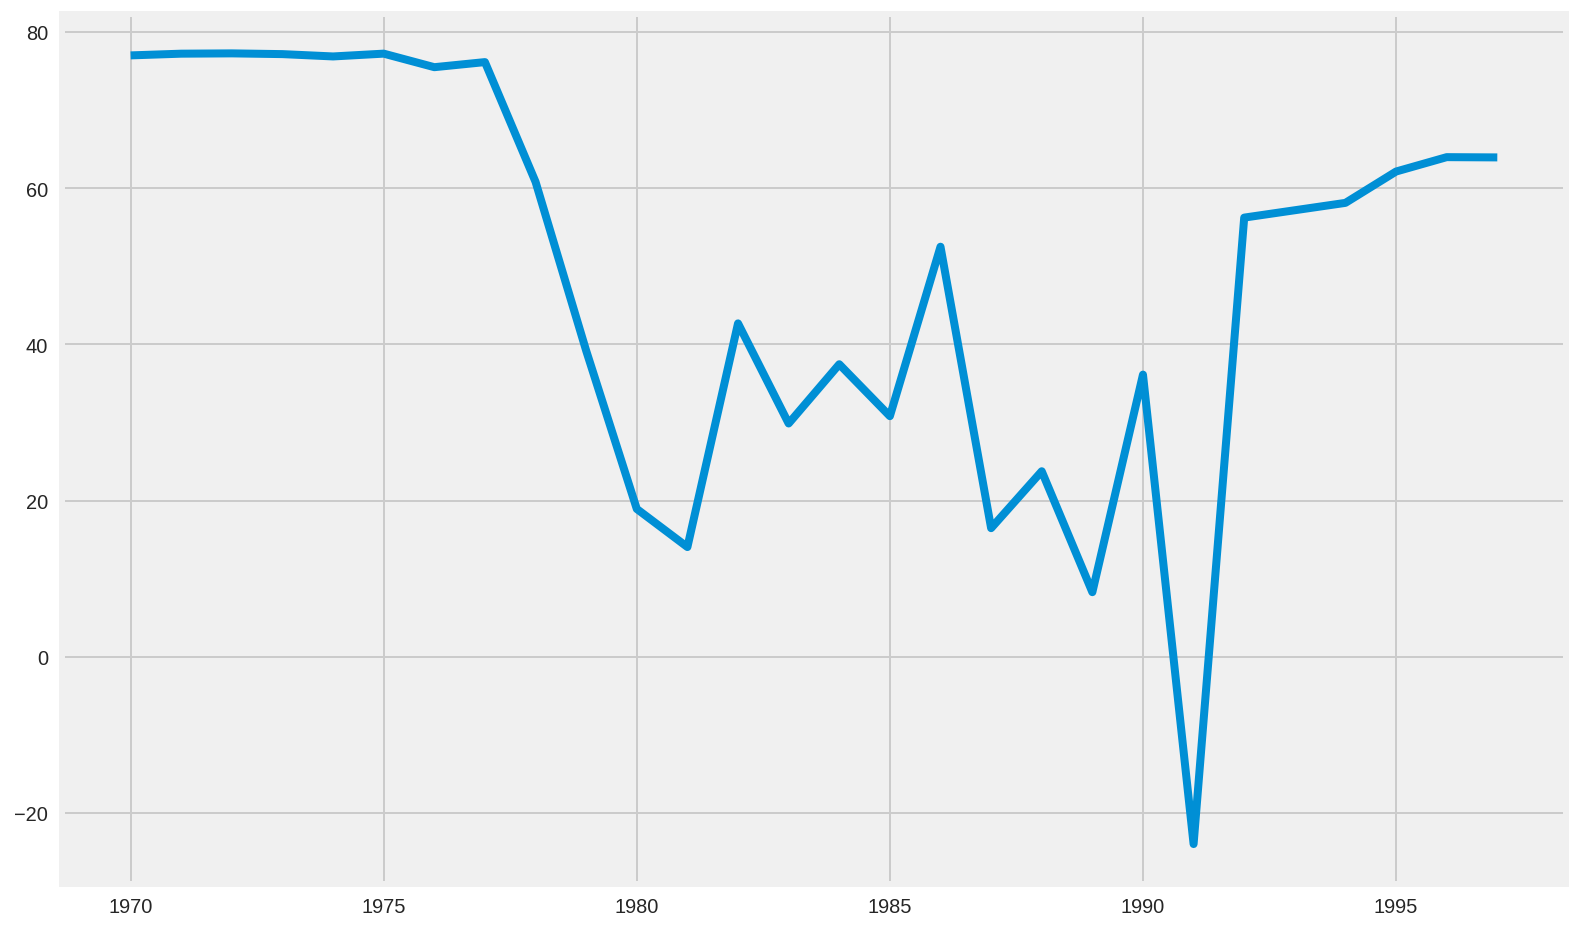

In [76]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(central_america_final.iyear.values, float(start_central_america['central_america_intercept']) + \
                                         central_america_final.iyear.values * float(start_central_america['iyear_beta']) + \
                                         central_america_final.attacktype1.values * float(start_central_america['attacktype1_beta']) + \
                                         central_america_final.nkill.values * float(start_central_america['nkill_beta']) + \
                                         central_america_final.nwound.values * float(start_central_america['nwound_beta']));

### South America

In [77]:
with pm.Model() as south_america_reg:
    bombing_std = pm.Uniform('south_america_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('south_america_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + south_america_final.iyear.values * iyear_beta +\
                                          south_america_final.attacktype1.values * attacktype1_beta + \
                                         south_america_final.nkill.values * nkill_beta +\
                                         south_america_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = south_america_final.bombing.values)
    

In [78]:
with south_america_reg:
    step = pm.NUTS()
    start_south_america = pm.find_MAP()
    trace_south_america = pm.sample(50000, step=step, start=start_south_america, njobs=4)

logp = -191.26, ||grad|| = 0.49851: 100%|██████████| 39/39 [00:00<00:00, 1606.63it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, south_america_intercept, south_america_error_std_interval__]
100%|██████████| 50500/50500 [06:58<00:00, 120.59it/s]
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.879833719555, but should be close to 0.8. Try to increase the number of tuning steps.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.


In [79]:
start_south_america

{'attacktype1_beta': array(-0.03013712018307634),
 'iyear_beta': array(0.04129194518697178),
 'nkill_beta': array(0.00037215625921021287),
 'nwound_beta': array(-0.042059386140011416),
 'south_america_error_std': array(46.57856071470096),
 'south_america_error_std_interval__': array(-4.151558980526479),
 'south_america_intercept': array(2.8827175831356186e-05)}

In [80]:
south_america_array = float(start_south_america['south_america_intercept']) + south_america_final.iyear.values * float(start_south_america['iyear_beta']) + \
                                         south_america_final.attacktype1.values * float(start_south_america['attacktype1_beta']) + \
                                         south_america_final.nkill.values * float(start_south_america['nkill_beta']) + \
                                         south_america_final.nwound.values * float(start_south_america['nwound_beta'])

In [81]:
south_america_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
south_america_df_bombing['year'] = south_america_final.iyear
south_america_df_bombing['map_bombing'] = south_america_array
south_america_df_bombing.tail()

,year,map_bombing
22,1992,-15.872854
23,1994,50.709133
24,1995,55.112502
25,1996,42.689385
26,1997,31.878553


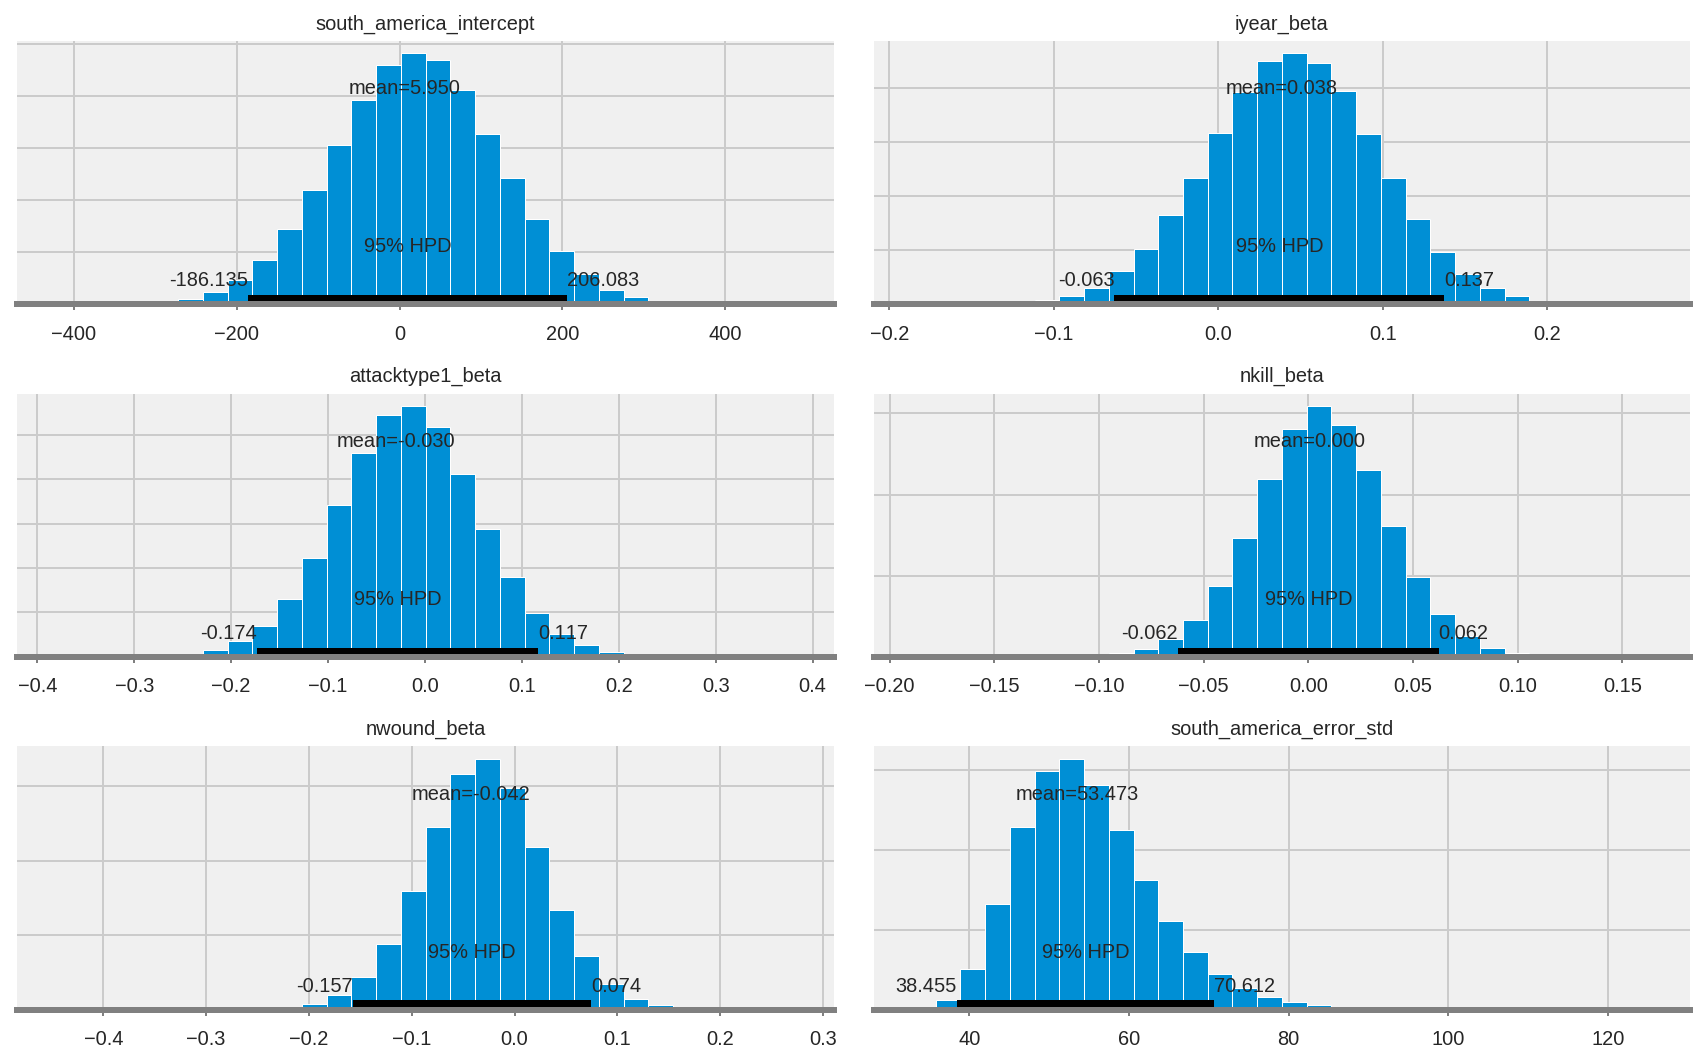

In [82]:
pm.plot_posterior(trace_south_america);

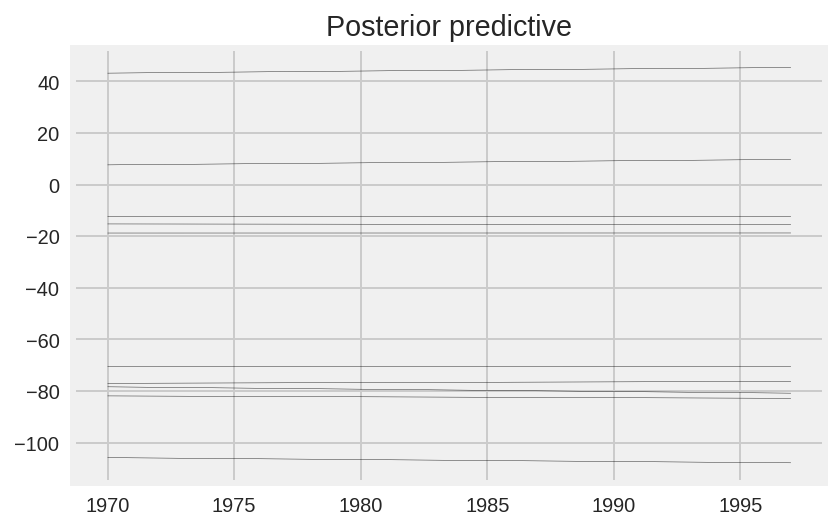

In [83]:
pm.plot_posterior_predictive_glm(trace_south_america, samples = 10, lm = lambda x, sample: \
                                float(sample['south_america_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = south_america_final.iyear.values,\
                                label = 'posterior predictive regression lines');

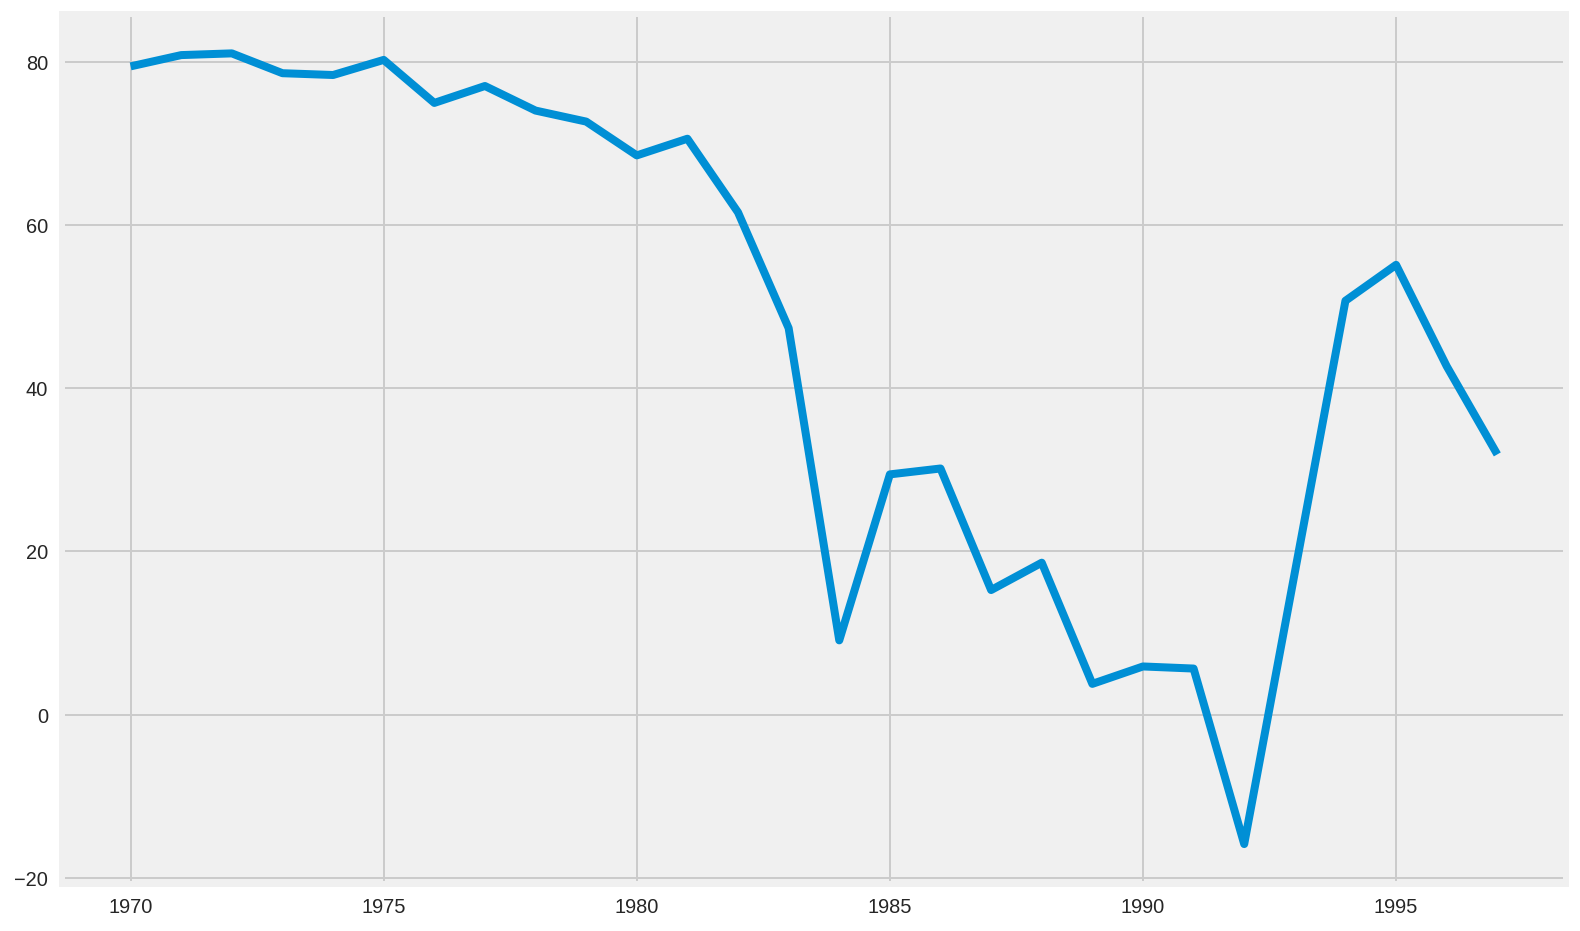

In [84]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(south_america_final.iyear.values, float(start_south_america['south_america_intercept']) + \
                                         south_america_final.iyear.values * float(start_south_america['iyear_beta']) + \
                                         south_america_final.attacktype1.values * float(start_south_america['attacktype1_beta']) + \
                                         south_america_final.nkill.values * float(start_south_america['nkill_beta']) + \
                                         south_america_final.nwound.values * float(start_south_america['nwound_beta']));

### East Asia

In [85]:
with pm.Model() as east_asia_reg:
    bombing_std = pm.Uniform('east_asia_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('east_asia_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + east_asia_final.iyear.values * iyear_beta +\
                                          east_asia_final.attacktype1.values * attacktype1_beta + \
                                         east_asia_final.nkill.values * nkill_beta +\
                                         east_asia_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = east_asia_final.bombing.values)
    

In [86]:
with east_asia_reg:
    step = pm.NUTS()
    start_east_asia = pm.find_MAP()
    trace_east_asia = pm.sample(50000, step=step, start=start_east_asia, njobs=4)

logp = -177.55, ||grad|| = 8.6264: 100%|██████████| 49/49 [00:00<00:00, 1768.56it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, east_asia_intercept, east_asia_error_std_interval__]
100%|██████████| 50500/50500 [04:21<00:00, 193.16it/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [87]:
start_east_asia

{'attacktype1_beta': array(-0.5078910503943252),
 'east_asia_error_std': array(50.72248978962095),
 'east_asia_error_std_interval__': array(-4.064928468326314),
 'east_asia_intercept': array(0.0010835273832026653),
 'iyear_beta': array(0.03149147882981851),
 'nkill_beta': array(-0.7570017414989767),
 'nwound_beta': array(-0.0016106466867642838)}

In [88]:
east_asia_array = float(start_east_asia['east_asia_intercept']) + east_asia_final.iyear.values * float(start_east_asia['iyear_beta']) + \
                                         east_asia_final.attacktype1.values * float(start_east_asia['attacktype1_beta']) + \
                                         east_asia_final.nkill.values * float(start_east_asia['nkill_beta']) + \
                                         east_asia_final.nwound.values * float(start_east_asia['nwound_beta'])

In [89]:
east_asia_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
east_asia_df_bombing['year'] = east_asia_final.iyear
east_asia_df_bombing['map_bombing'] = east_asia_array
east_asia_df_bombing.tail()

,year,map_bombing
19,1992,4.628592
20,1994,18.803022
21,1995,17.279672
22,1996,-6.319707
23,1997,13.617802


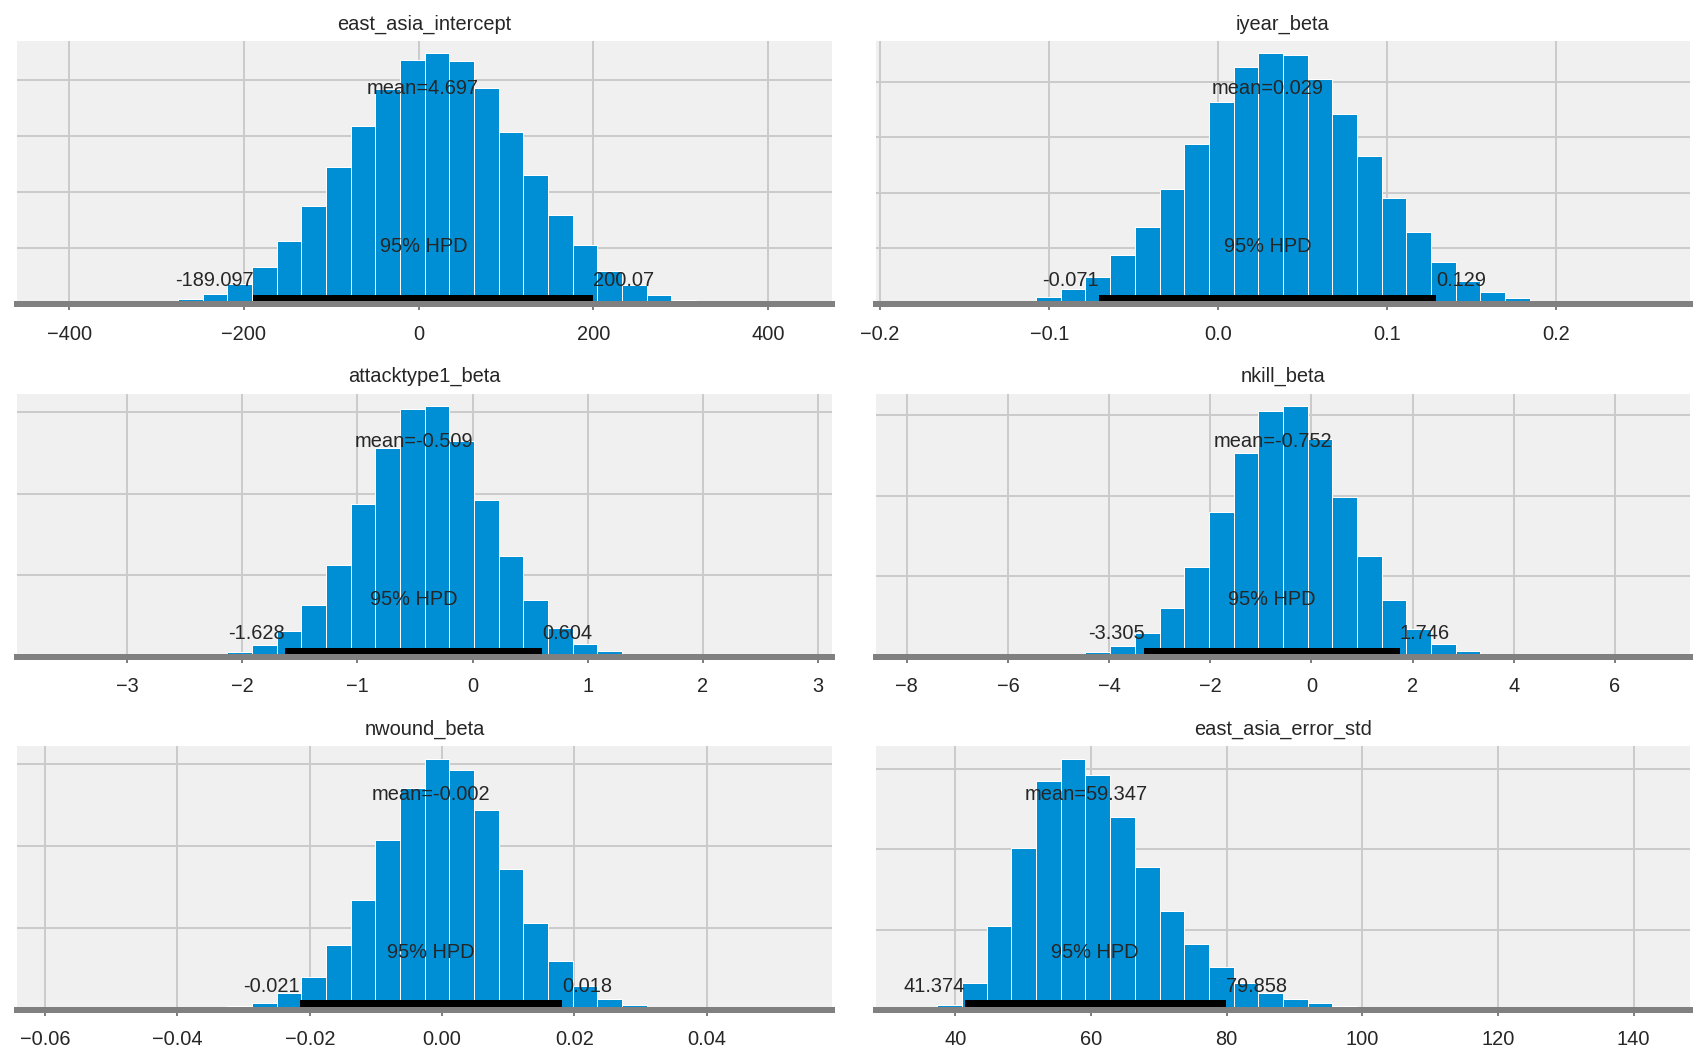

In [90]:
pm.plot_posterior(trace_east_asia);

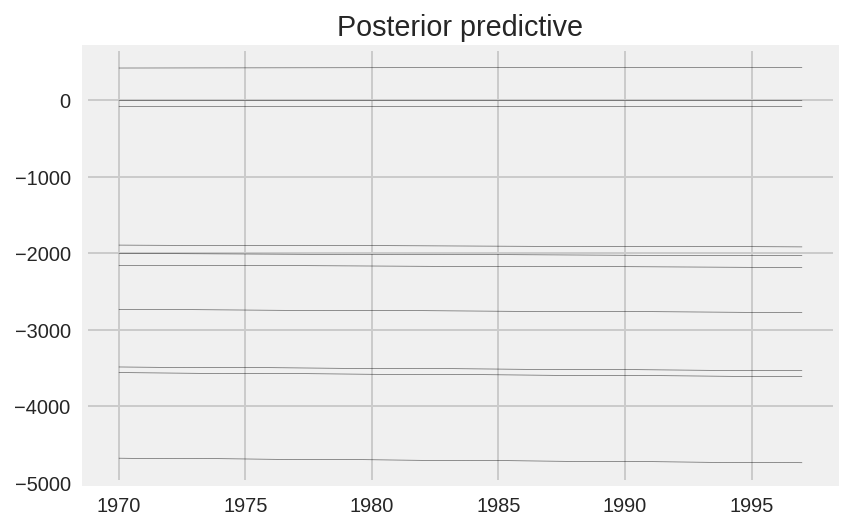

In [91]:
pm.plot_posterior_predictive_glm(trace_east_asia, samples = 10, lm = lambda x, sample: \
                                float(sample['east_asia_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = east_asia_final.iyear.values,\
                                label = 'posterior predictive regression lines');

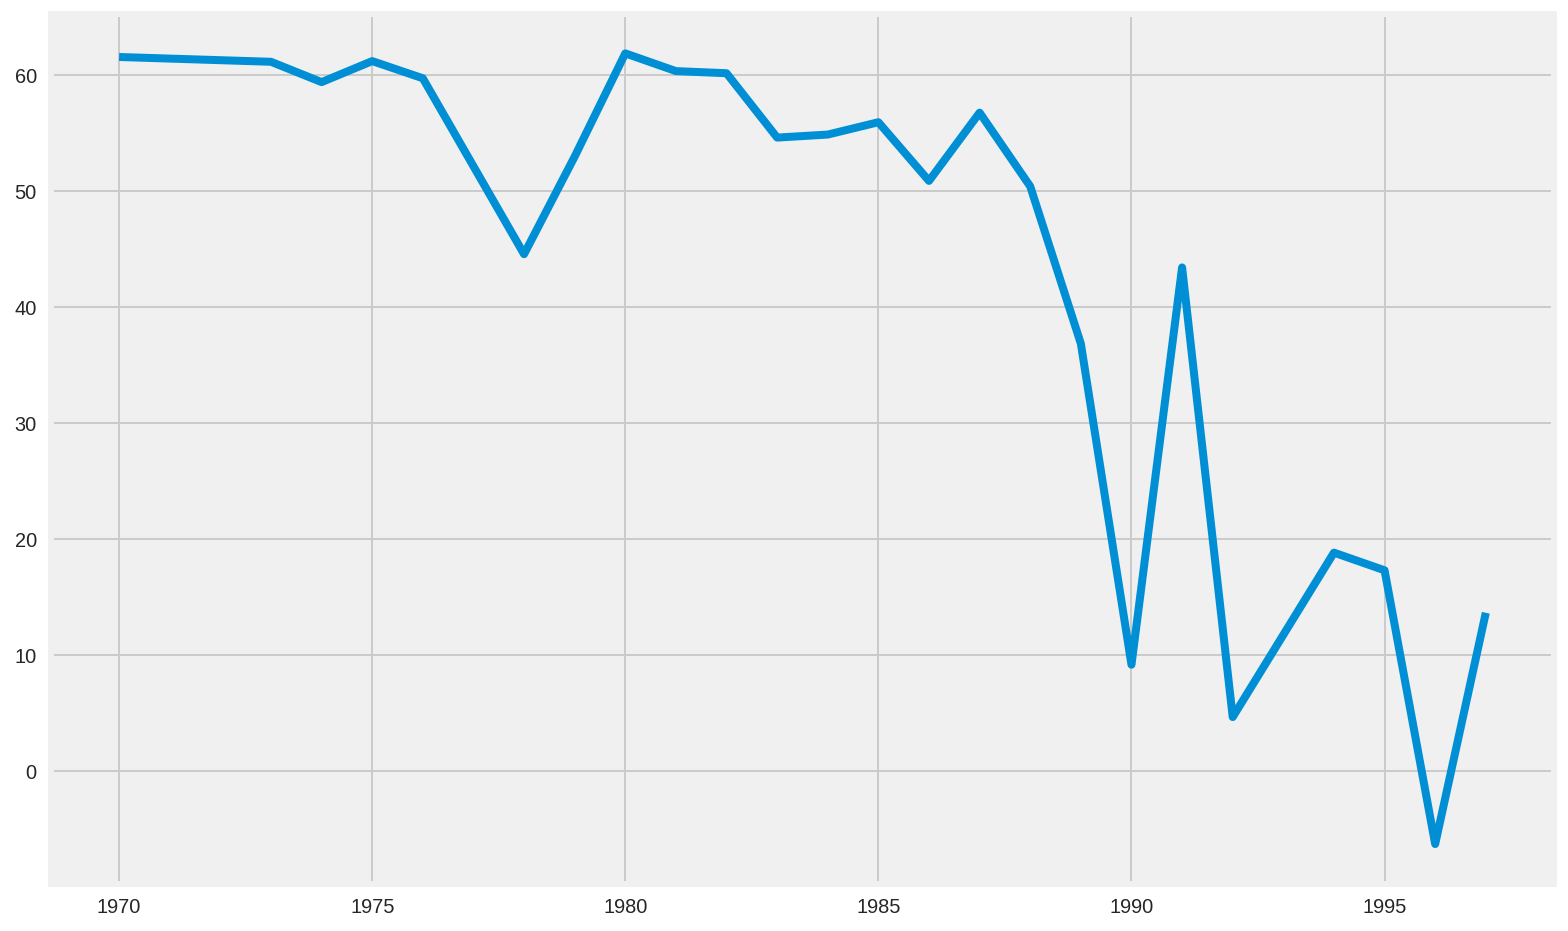

In [92]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(east_asia_final.iyear.values, float(start_east_asia['east_asia_intercept']) + \
                                         east_asia_final.iyear.values * float(start_east_asia['iyear_beta']) + \
                                         east_asia_final.attacktype1.values * float(start_east_asia['attacktype1_beta']) + \
                                         east_asia_final.nkill.values * float(start_east_asia['nkill_beta']) + \
                                         east_asia_final.nwound.values * float(start_east_asia['nwound_beta']));

### Southeast Asia

In [93]:
with pm.Model() as southeast_asia_reg:
    bombing_std = pm.Uniform('southeast_asia_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('southeast_asia_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + southeast_asia_final.iyear.values * iyear_beta +\
                                          southeast_asia_final.attacktype1.values * attacktype1_beta + \
                                         southeast_asia_final.nkill.values * nkill_beta +\
                                         southeast_asia_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = southeast_asia_final.bombing.values)
    

In [94]:
with southeast_asia_reg:
    step = pm.NUTS()
    start_southeast_asia = pm.find_MAP()
    trace_southeast_asia = pm.sample(50000, step=step, start=start_southeast_asia, njobs=4)

logp = -190.23, ||grad|| = 0.04728: 100%|██████████| 43/43 [00:00<00:00, 1722.01it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, southeast_asia_intercept, southeast_asia_error_std_interval__]
100%|██████████| 50500/50500 [07:02<00:00, 119.41it/s]
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 19 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.914495821399, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [95]:
start_southeast_asia

{'attacktype1_beta': array(0.03933194608831449),
 'iyear_beta': array(0.046733061389865174),
 'nkill_beta': array(-0.09611824953518805),
 'nwound_beta': array(-0.07628751569212178),
 'southeast_asia_error_std': array(44.83563408202941),
 'southeast_asia_error_std_interval__': array(-4.190285000732524),
 'southeast_asia_intercept': array(6.902403639804373e-05)}

In [96]:
southeast_asia_array = float(start_southeast_asia['southeast_asia_intercept']) + southeast_asia_final.iyear.values * float(start_southeast_asia['iyear_beta']) + \
                                         southeast_asia_final.attacktype1.values * float(start_southeast_asia['attacktype1_beta']) + \
                                         southeast_asia_final.nkill.values * float(start_southeast_asia['nkill_beta']) + \
                                         southeast_asia_final.nwound.values * float(start_southeast_asia['nwound_beta'])

In [97]:
southeast_asia_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
southeast_asia_df_bombing['year'] = southeast_asia_final.iyear
southeast_asia_df_bombing['map_bombing'] = southeast_asia_array
southeast_asia_df_bombing.tail()

,year,map_bombing
22,1992,-19.249786
23,1994,34.927935
24,1995,47.220239
25,1996,40.815783
26,1997,14.781105


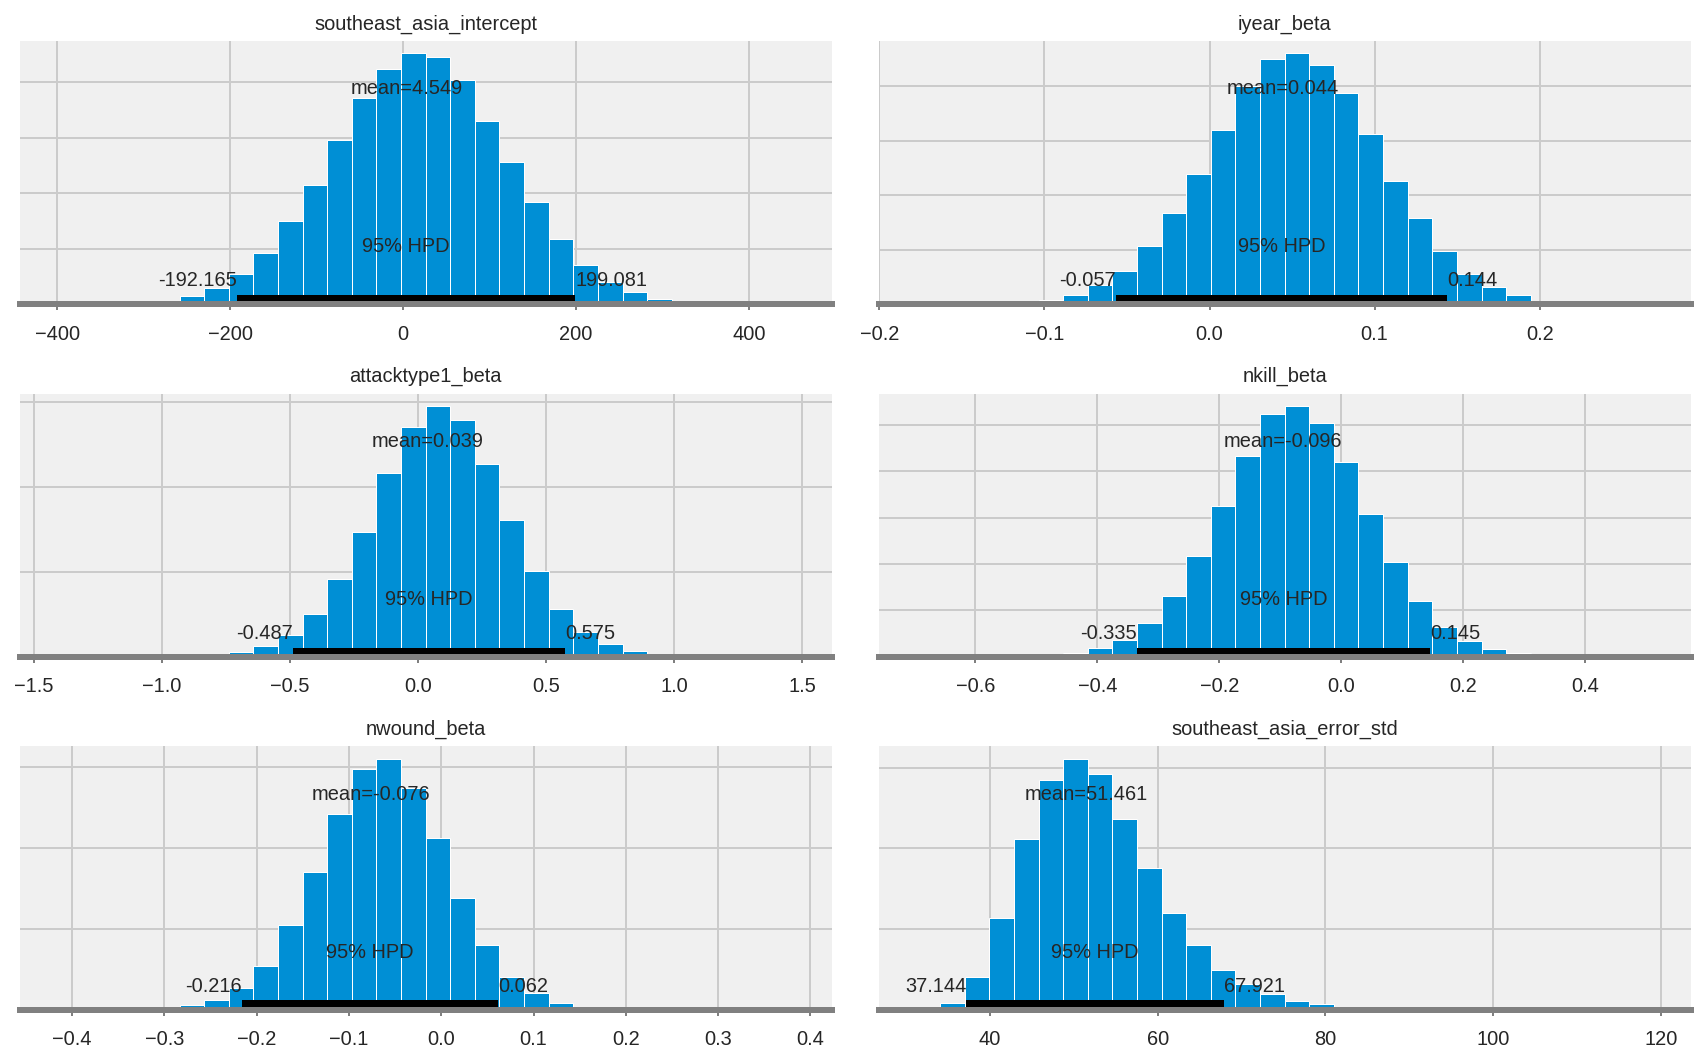

In [98]:
pm.plot_posterior(trace_southeast_asia);

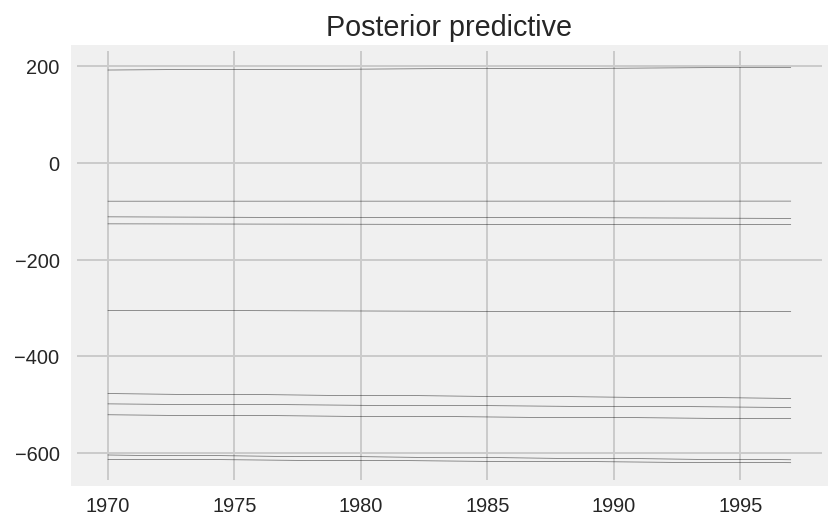

In [99]:
pm.plot_posterior_predictive_glm(trace_southeast_asia, samples = 10, lm = lambda x, sample: \
                                float(sample['southeast_asia_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = southeast_asia_final.iyear.values,\
                                label = 'posterior predictive regression lines');

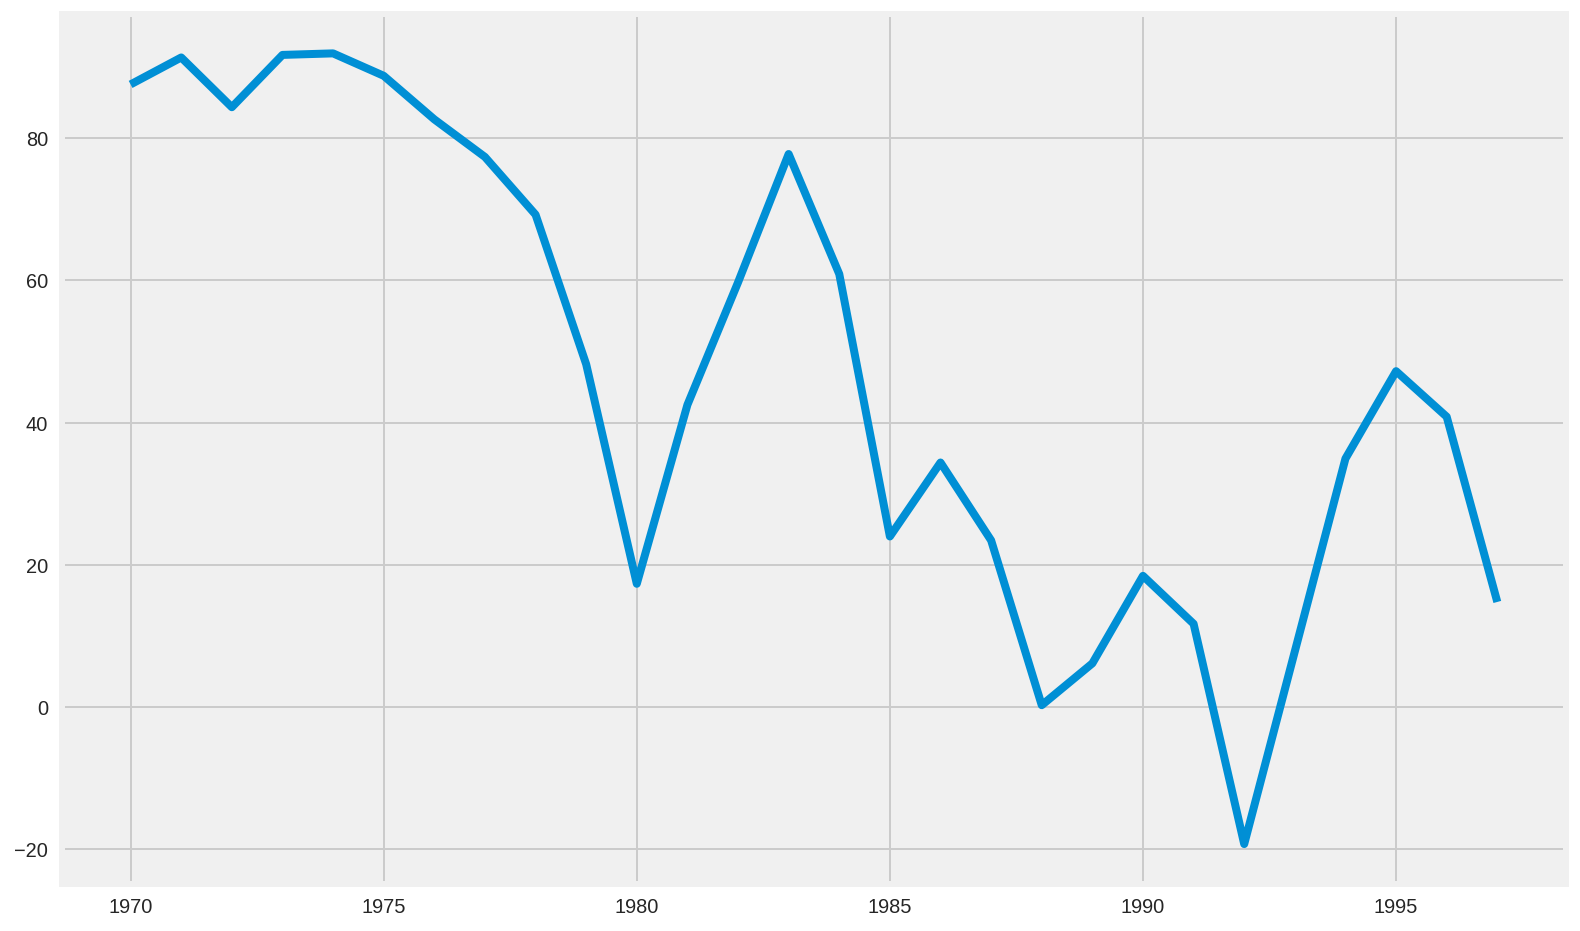

In [100]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(southeast_asia_final.iyear.values, float(start_southeast_asia['southeast_asia_intercept']) + \
                                         southeast_asia_final.iyear.values * float(start_southeast_asia['iyear_beta']) + \
                                         southeast_asia_final.attacktype1.values * float(start_southeast_asia['attacktype1_beta']) + \
                                         southeast_asia_final.nkill.values * float(start_southeast_asia['nkill_beta']) + \
                                         southeast_asia_final.nwound.values * float(start_southeast_asia['nwound_beta']));

### South Asia

In [101]:
with pm.Model() as south_asia_reg:
    bombing_std = pm.Uniform('south_asia_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('south_asia_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + south_asia_final.iyear.values * iyear_beta +\
                                          south_asia_final.attacktype1.values * attacktype1_beta + \
                                         south_asia_final.nkill.values * nkill_beta +\
                                         south_asia_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = south_asia_final.bombing.values)
    

In [102]:
with south_asia_reg:
    step = pm.NUTS()
    start_south_asia = pm.find_MAP()
    trace_south_asia = pm.sample(50000, step=step, start=start_south_asia, njobs=4)

logp = -186.31, ||grad|| = 1.6399: 100%|██████████| 40/40 [00:00<00:00, 1746.12it/s]          
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, south_asia_intercept, south_asia_error_std_interval__]
100%|██████████| 50500/50500 [06:52<00:00, 122.44it/s]
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 149 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [103]:
start_south_asia

{'attacktype1_beta': array(0.004977800628293678),
 'iyear_beta': array(0.034216929140316855),
 'nkill_beta': array(-0.019668187610554496),
 'nwound_beta': array(-0.005242051460283155),
 'south_asia_error_std': array(47.12747098204298),
 'south_asia_error_std_interval__': array(-4.139657735523851),
 'south_asia_intercept': array(2.2948358758006776e-05)}

In [104]:
south_asia_array = float(start_south_asia['south_asia_intercept']) + south_asia_final.iyear.values * float(start_south_asia['iyear_beta']) + \
                                         south_asia_final.attacktype1.values * float(start_south_asia['attacktype1_beta']) + \
                                         south_asia_final.nkill.values * float(start_south_asia['nkill_beta']) + \
                                         south_asia_final.nwound.values * float(start_south_asia['nwound_beta'])

In [105]:
south_asia_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
south_asia_df_bombing['year'] = south_asia_final.iyear
south_asia_df_bombing['map_bombing'] = south_asia_array
south_asia_df_bombing.tail()

,year,map_bombing
21,1992,9.729507
22,1994,41.456299
23,1995,17.210981
24,1996,6.583377
25,1997,24.594720


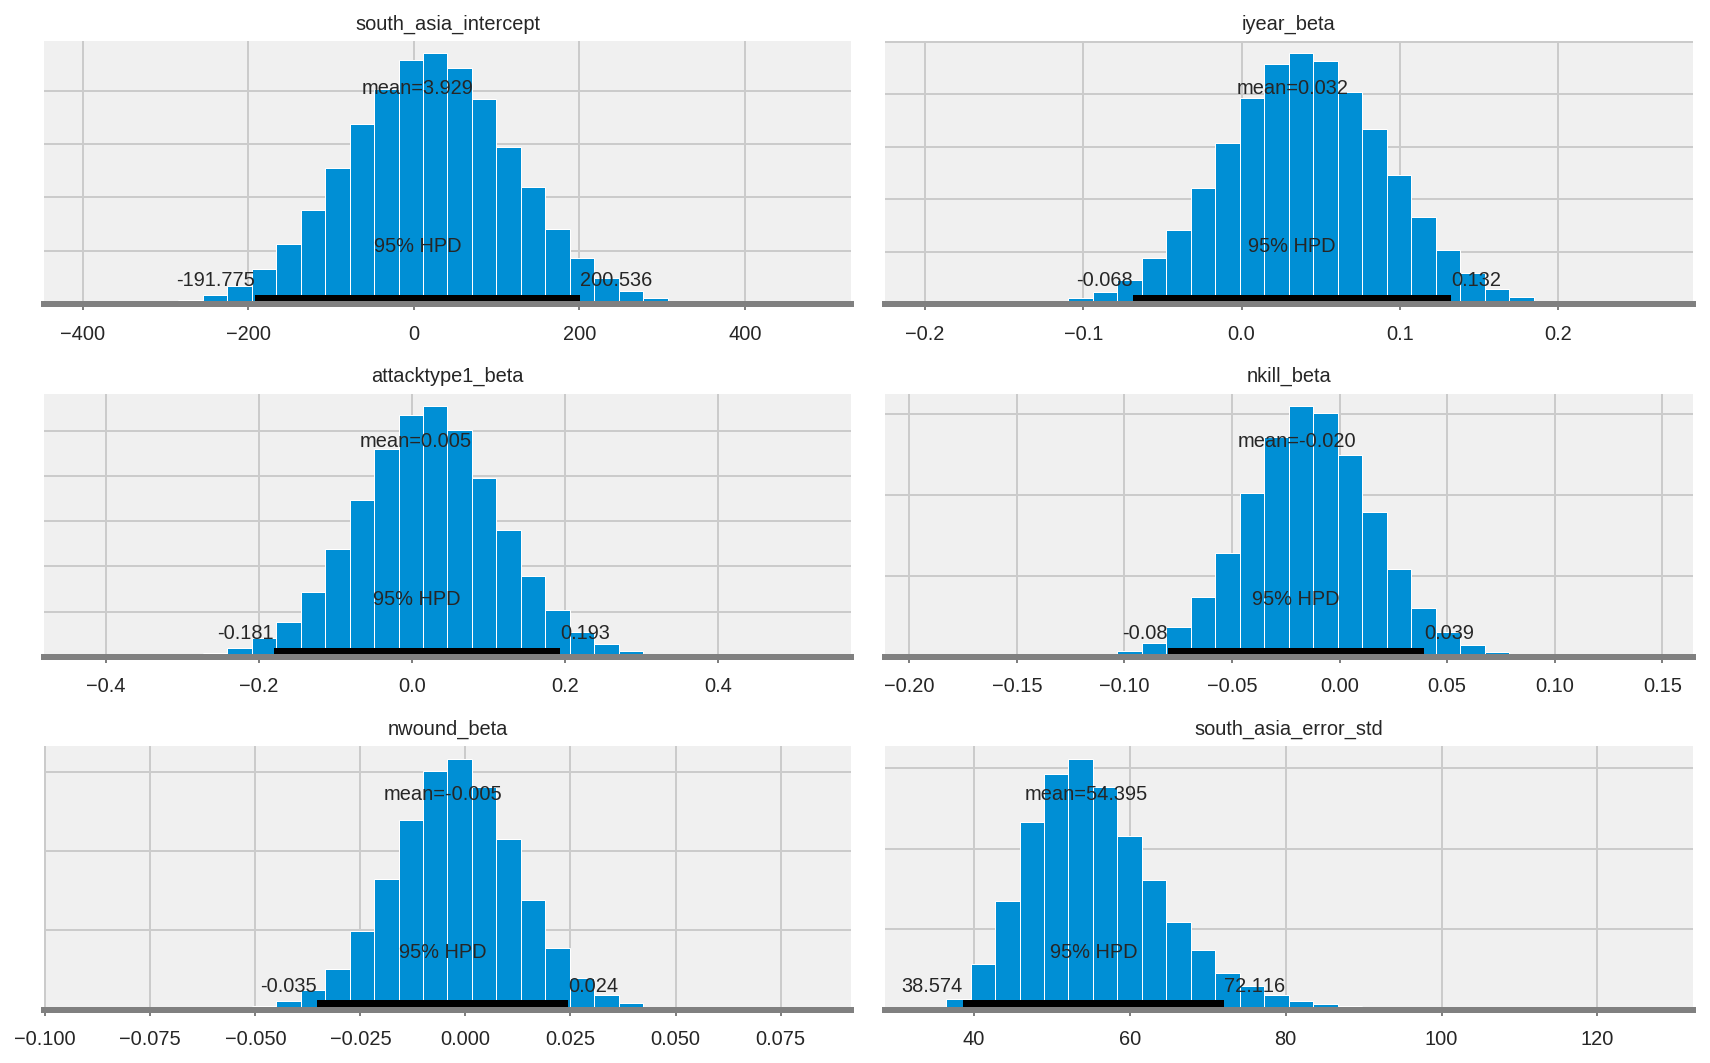

In [106]:
pm.plot_posterior(trace_south_asia);

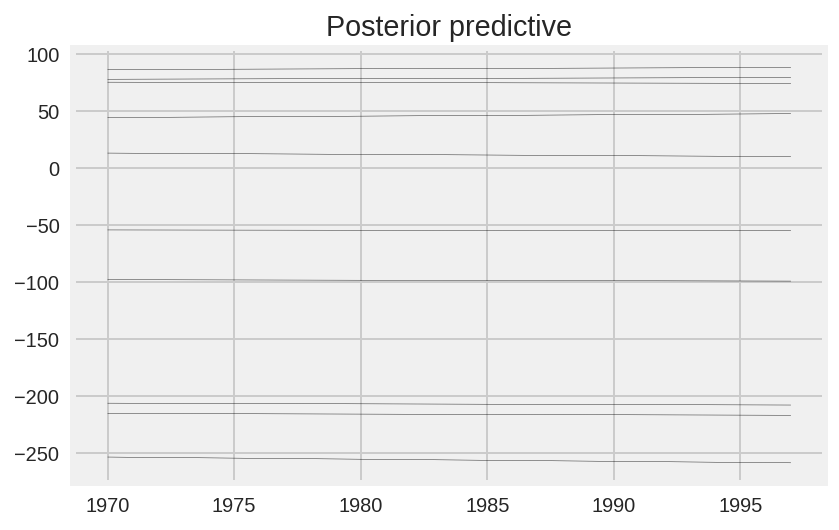

In [107]:
pm.plot_posterior_predictive_glm(trace_south_asia, samples = 10, lm = lambda x, sample: \
                                float(sample['south_asia_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = south_asia_final.iyear.values,\
                                label = 'posterior predictive regression lines');

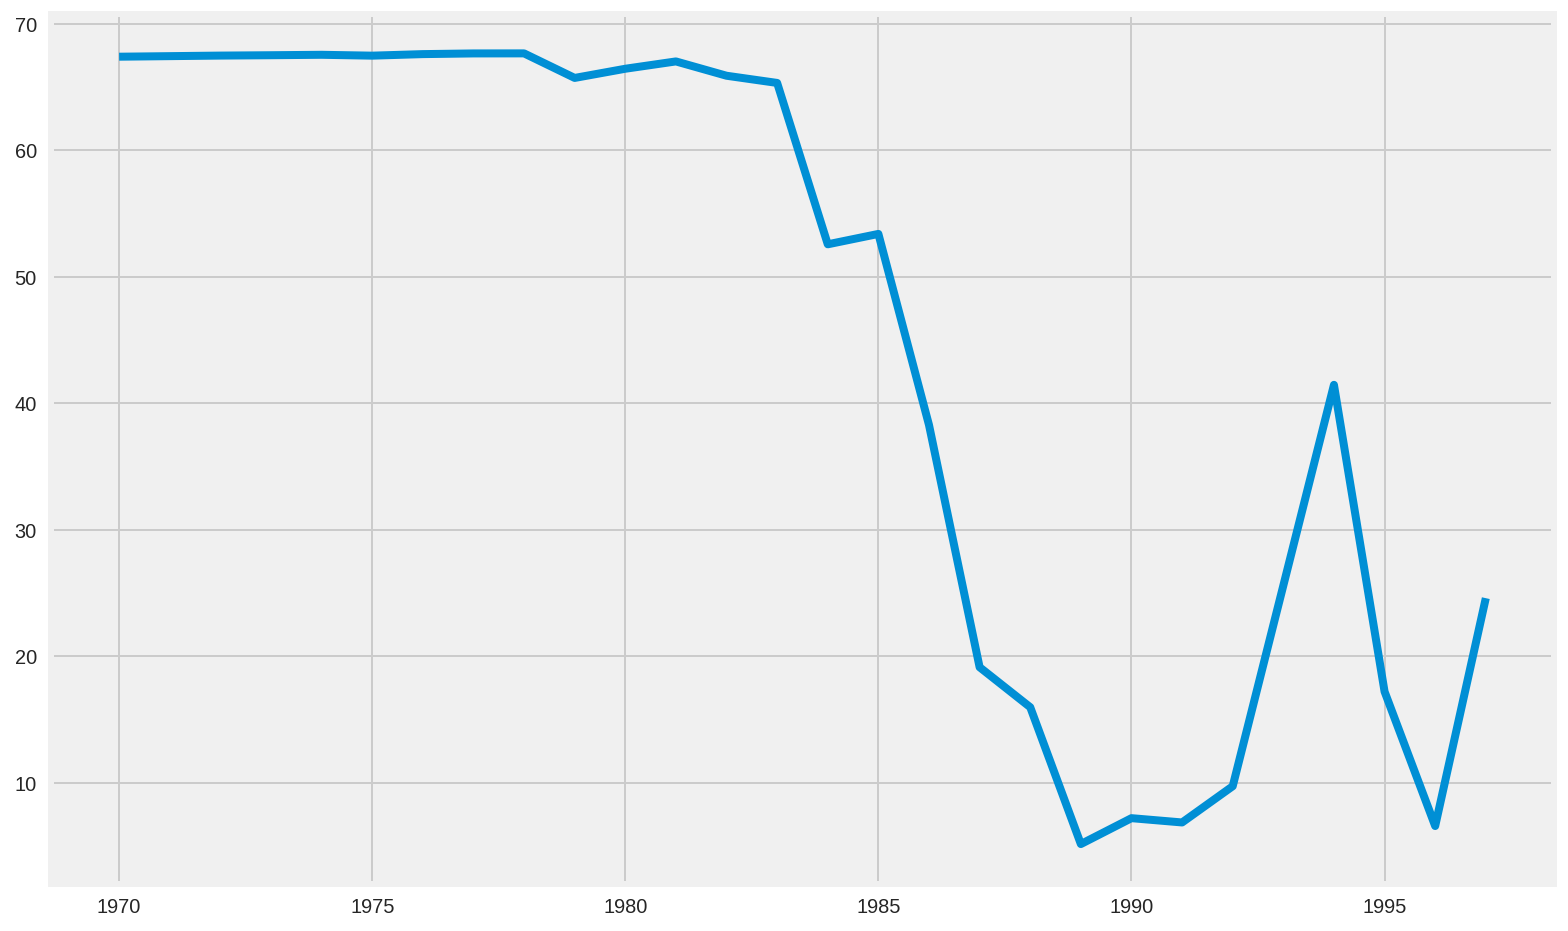

In [108]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(south_asia_final.iyear.values, float(start_south_asia['south_asia_intercept']) + \
                                         south_asia_final.iyear.values * float(start_south_asia['iyear_beta']) + \
                                         south_asia_final.attacktype1.values * float(start_south_asia['attacktype1_beta']) + \
                                         south_asia_final.nkill.values * float(start_south_asia['nkill_beta']) + \
                                         south_asia_final.nwound.values * float(start_south_asia['nwound_beta']));

### Central Asia

In [109]:
with pm.Model() as central_asia_reg:
    bombing_std = pm.Uniform('central_asia_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('central_asia_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + central_asia_final.iyear.values * iyear_beta +\
                                          central_asia_final.attacktype1.values * attacktype1_beta + \
                                         central_asia_final.nkill.values * nkill_beta +\
                                         central_asia_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = central_asia_final.bombing.values)
    

In [110]:
with central_asia_reg:
    step = pm.NUTS()
    start_central_asia = pm.find_MAP()
    trace_central_asia = pm.sample(50000, step=step, start=start_central_asia, njobs=4)

logp = -58.693, ||grad|| = 33.098: 100%|██████████| 87/87 [00:00<00:00, 1749.81it/s]      
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, central_asia_intercept, central_asia_error_std_interval__]
100%|██████████| 50500/50500 [10:14<00:00, 82.21it/s] 
There were 17397 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.405144647632, but should be close to 0.8. Try to increase the number of tuning steps.
There were 23620 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.278740010659, but should be close to 0.8. Try to increase the number of tuning steps.
There were 36091 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0508486424829, but should be close to 0.8. Try to increase the number o

In [111]:
start_central_asia

{'attacktype1_beta': array(0.3303164752349619),
 'central_asia_error_std': array(1.1691862166023446),
 'central_asia_error_std_interval__': array(-7.851703025360214),
 'central_asia_intercept': array(-2.1432951631150397e-05),
 'iyear_beta': array(0.007205116445136518),
 'nkill_beta': array(-0.1711333337264346),
 'nwound_beta': array(0.021844262784565475)}

In [112]:
central_asia_array = float(start_central_asia['central_asia_intercept']) + central_asia_final.iyear.values * float(start_central_asia['iyear_beta']) + \
                                         central_asia_final.attacktype1.values * float(start_central_asia['attacktype1_beta']) + \
                                         central_asia_final.nkill.values * float(start_central_asia['nkill_beta']) + \
                                         central_asia_final.nwound.values * float(start_central_asia['nwound_beta'])

In [113]:
central_asia_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
central_asia_df_bombing['year'] = central_asia_final.iyear
central_asia_df_bombing['map_bombing'] = central_asia_array
central_asia_df_bombing.tail()

,year,map_bombing
1,1992,4.837019
2,1994,19.743550
3,1995,17.896780
4,1996,16.659516
5,1997,17.738984


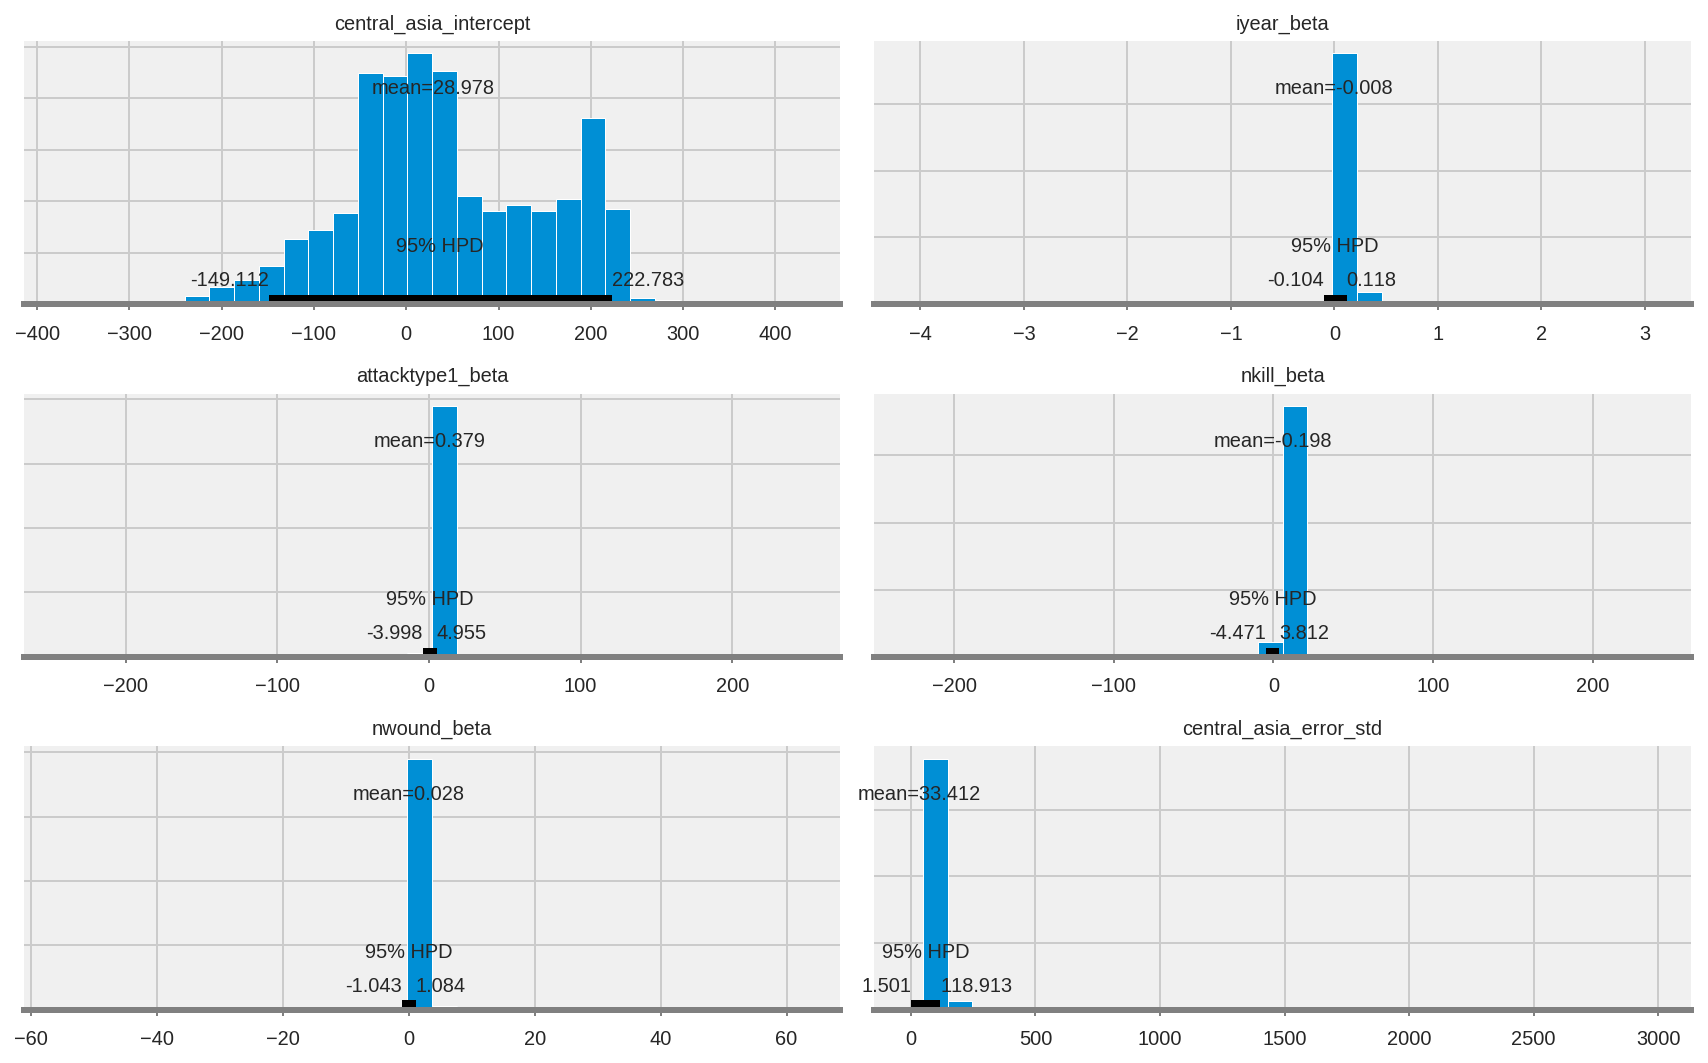

In [114]:
pm.plot_posterior(trace_central_asia);

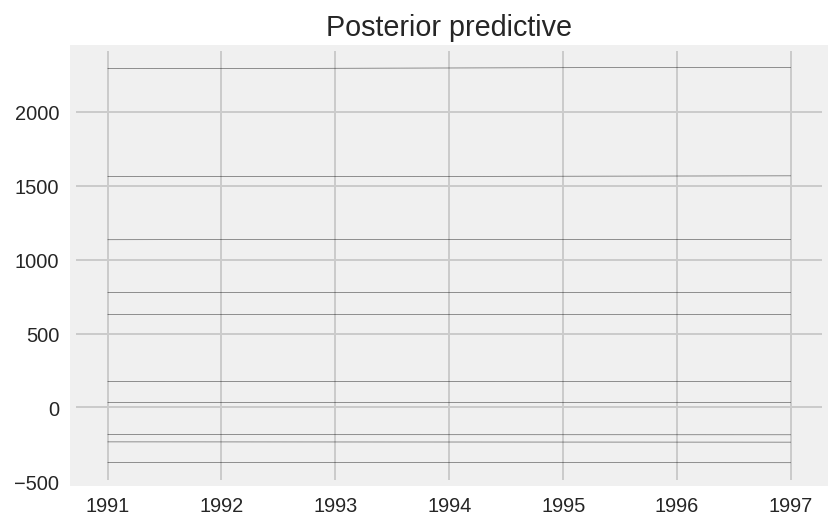

In [115]:
pm.plot_posterior_predictive_glm(trace_central_asia, samples = 10, lm = lambda x, sample: \
                                float(sample['central_asia_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = central_asia_final.iyear.values,\
                                label = 'posterior predictive regression lines');

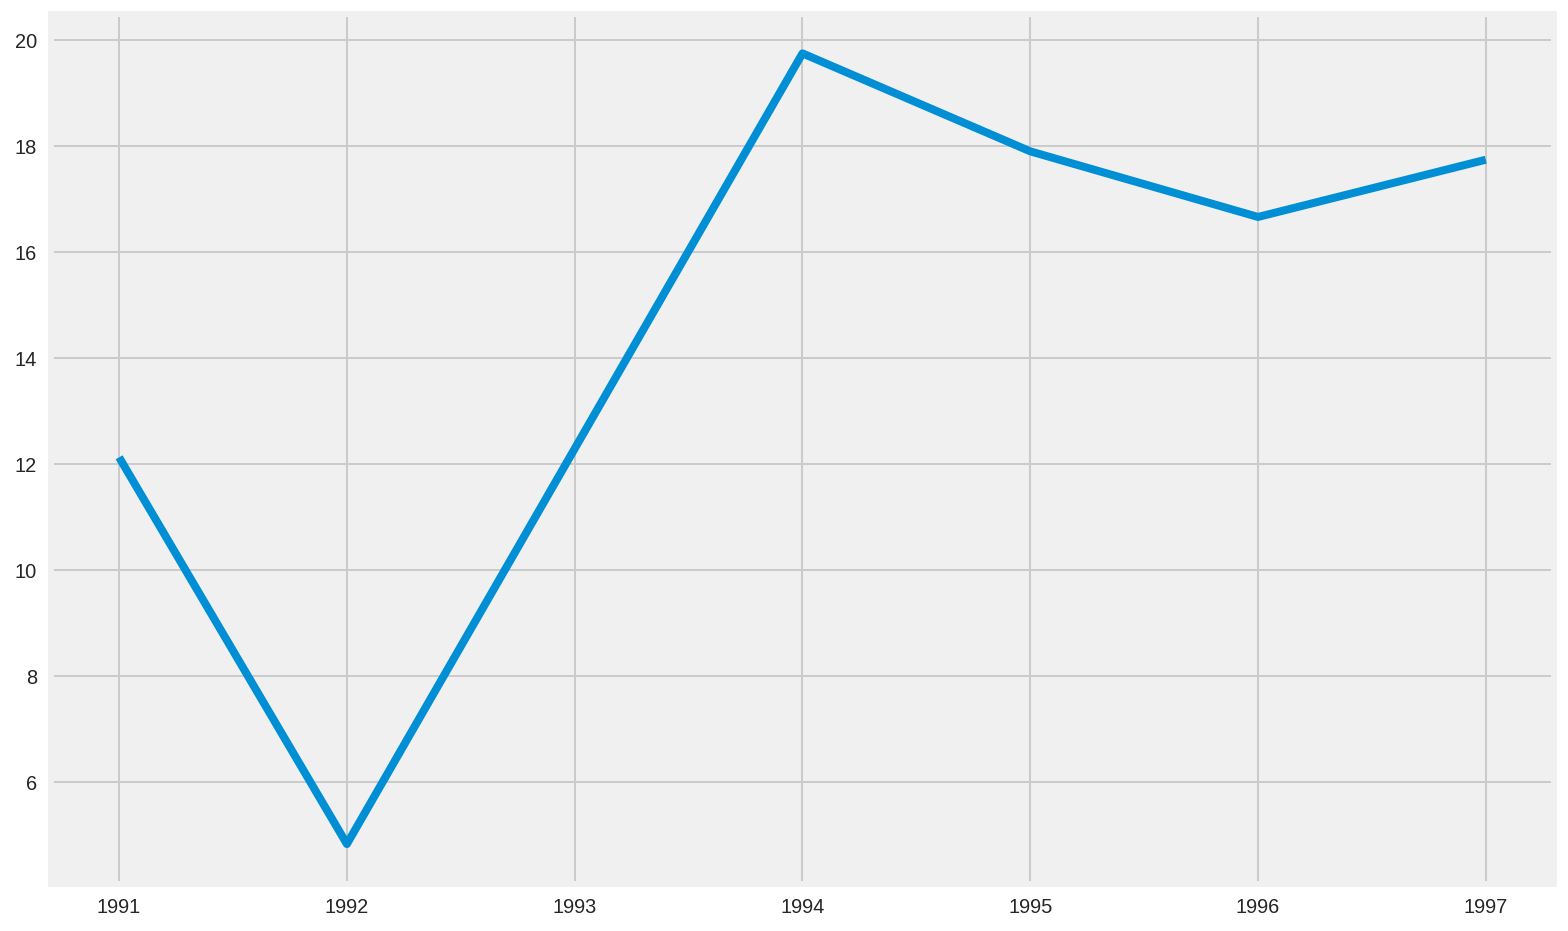

In [116]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(central_asia_final.iyear.values, float(start_central_asia['central_asia_intercept']) + \
                                         central_asia_final.iyear.values * float(start_central_asia['iyear_beta']) + \
                                         central_asia_final.attacktype1.values * float(start_central_asia['attacktype1_beta']) + \
                                         central_asia_final.nkill.values * float(start_central_asia['nkill_beta']) + \
                                         central_asia_final.nwound.values * float(start_central_asia['nwound_beta']));

### Western Europe

In [117]:
with pm.Model() as western_europe_reg:
    bombing_std = pm.Uniform('western_europe_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('western_europe_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + western_europe_final.iyear.values * iyear_beta +\
                                          western_europe_final.attacktype1.values * attacktype1_beta + \
                                         western_europe_final.nkill.values * nkill_beta +\
                                         western_europe_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = western_europe_final.bombing.values)
    

In [118]:
with western_europe_reg:
    step = pm.NUTS()
    start_western_europe = pm.find_MAP()
    trace_western_europe = pm.sample(50000, step=step, start=start_western_europe, njobs=4)

logp = -189.83, ||grad|| = 2.372: 100%|██████████| 46/46 [00:00<00:00, 1680.92it/s]   
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, western_europe_intercept, western_europe_error_std_interval__]
100%|██████████| 50500/50500 [06:51<00:00, 122.65it/s]
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.


In [119]:
start_western_europe

{'attacktype1_beta': array(-0.09107898318466709),
 'iyear_beta': array(0.057023628979820905),
 'nkill_beta': array(0.12249333629729424),
 'nwound_beta': array(-0.10496292995484066),
 'western_europe_error_std': array(44.16746387199515),
 'western_europe_error_std_interval__': array(-4.205525485477616),
 'western_europe_intercept': array(6.219518678041775e-05)}

In [120]:
western_europe_array = float(start_western_europe['western_europe_intercept']) + western_europe_final.iyear.values * float(start_western_europe['iyear_beta']) + \
                                         western_europe_final.attacktype1.values * float(start_western_europe['attacktype1_beta']) + \
                                         western_europe_final.nkill.values * float(start_western_europe['nkill_beta']) + \
                                         western_europe_final.nwound.values * float(start_western_europe['nwound_beta'])

In [121]:
western_europe_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
western_europe_df_bombing['year'] = western_europe_final.iyear
western_europe_df_bombing['map_bombing'] = western_europe_array
western_europe_df_bombing.tail()

,year,map_bombing
22,1992,-23.103194
23,1994,36.743818
24,1995,57.348753
25,1996,13.752606
26,1997,77.622141


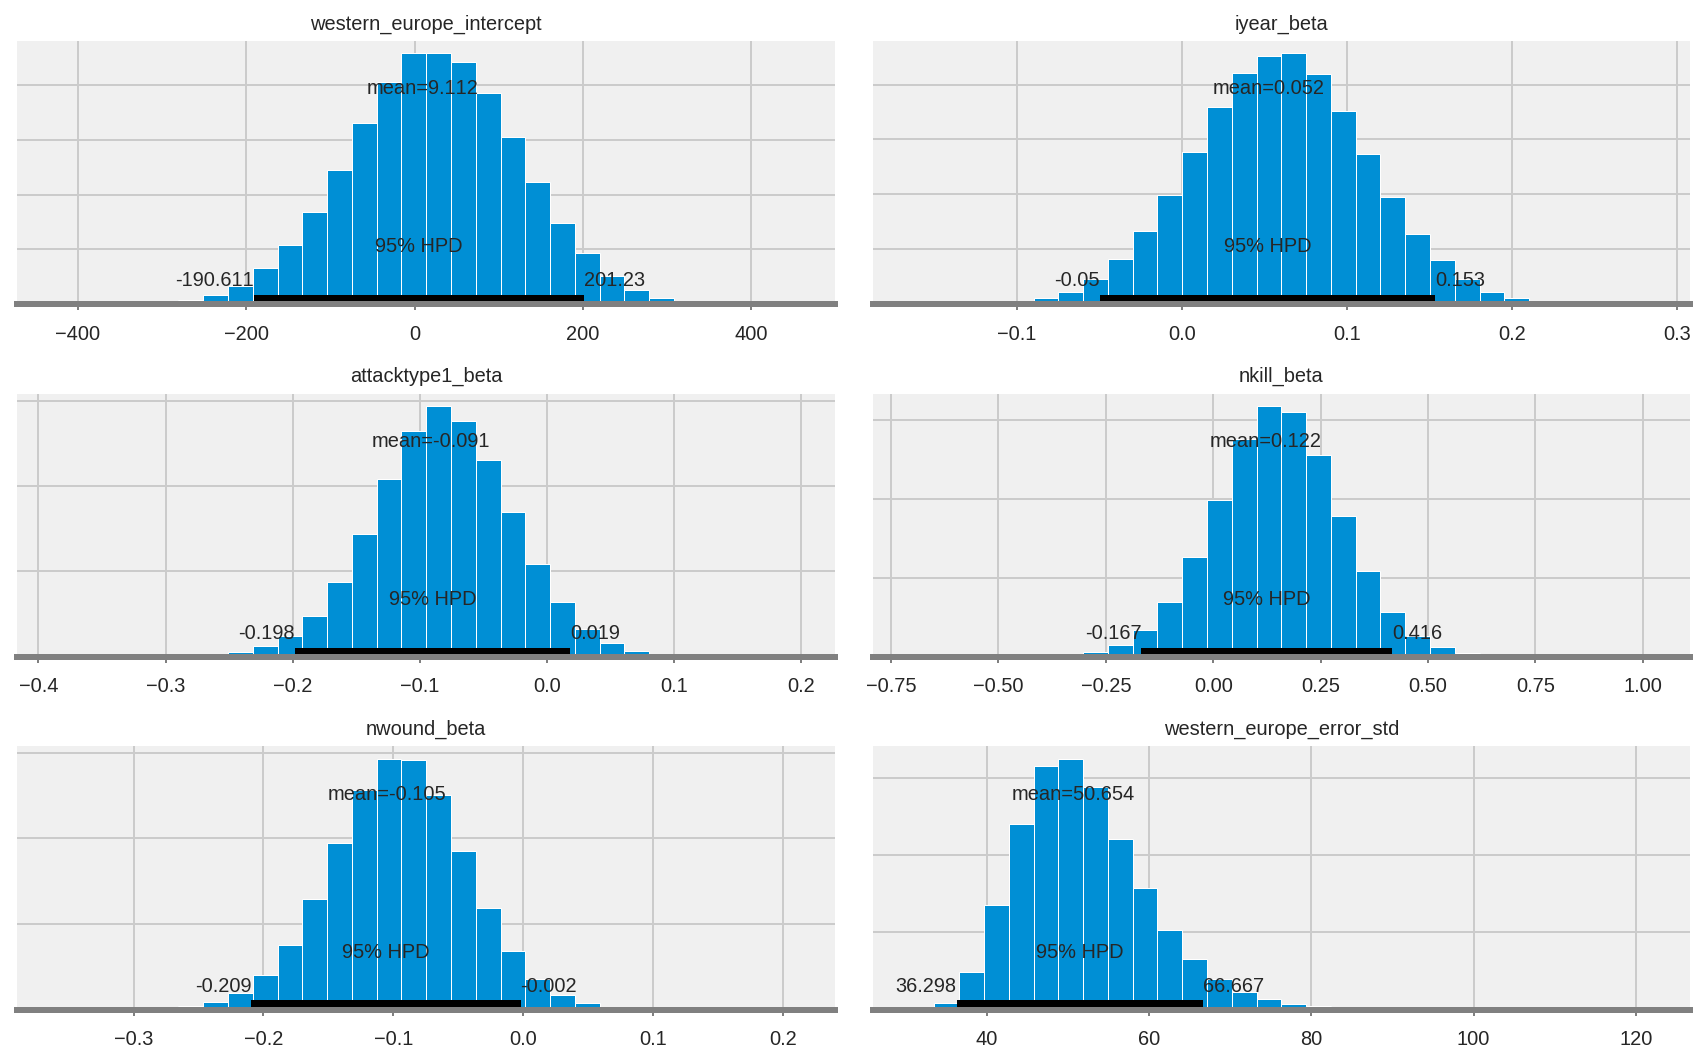

In [122]:
pm.plot_posterior(trace_western_europe);

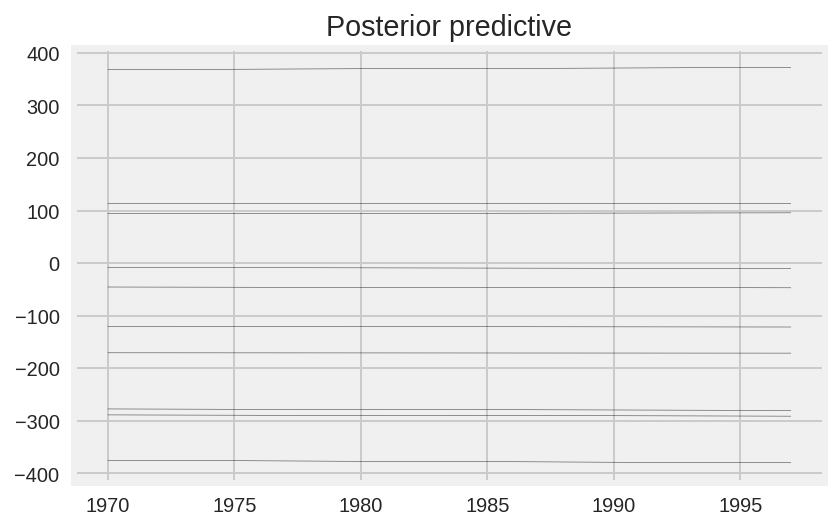

In [123]:
pm.plot_posterior_predictive_glm(trace_western_europe, samples = 10, lm = lambda x, sample: \
                                float(sample['western_europe_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = western_europe_final.iyear.values,\
                                label = 'posterior predictive regression lines');

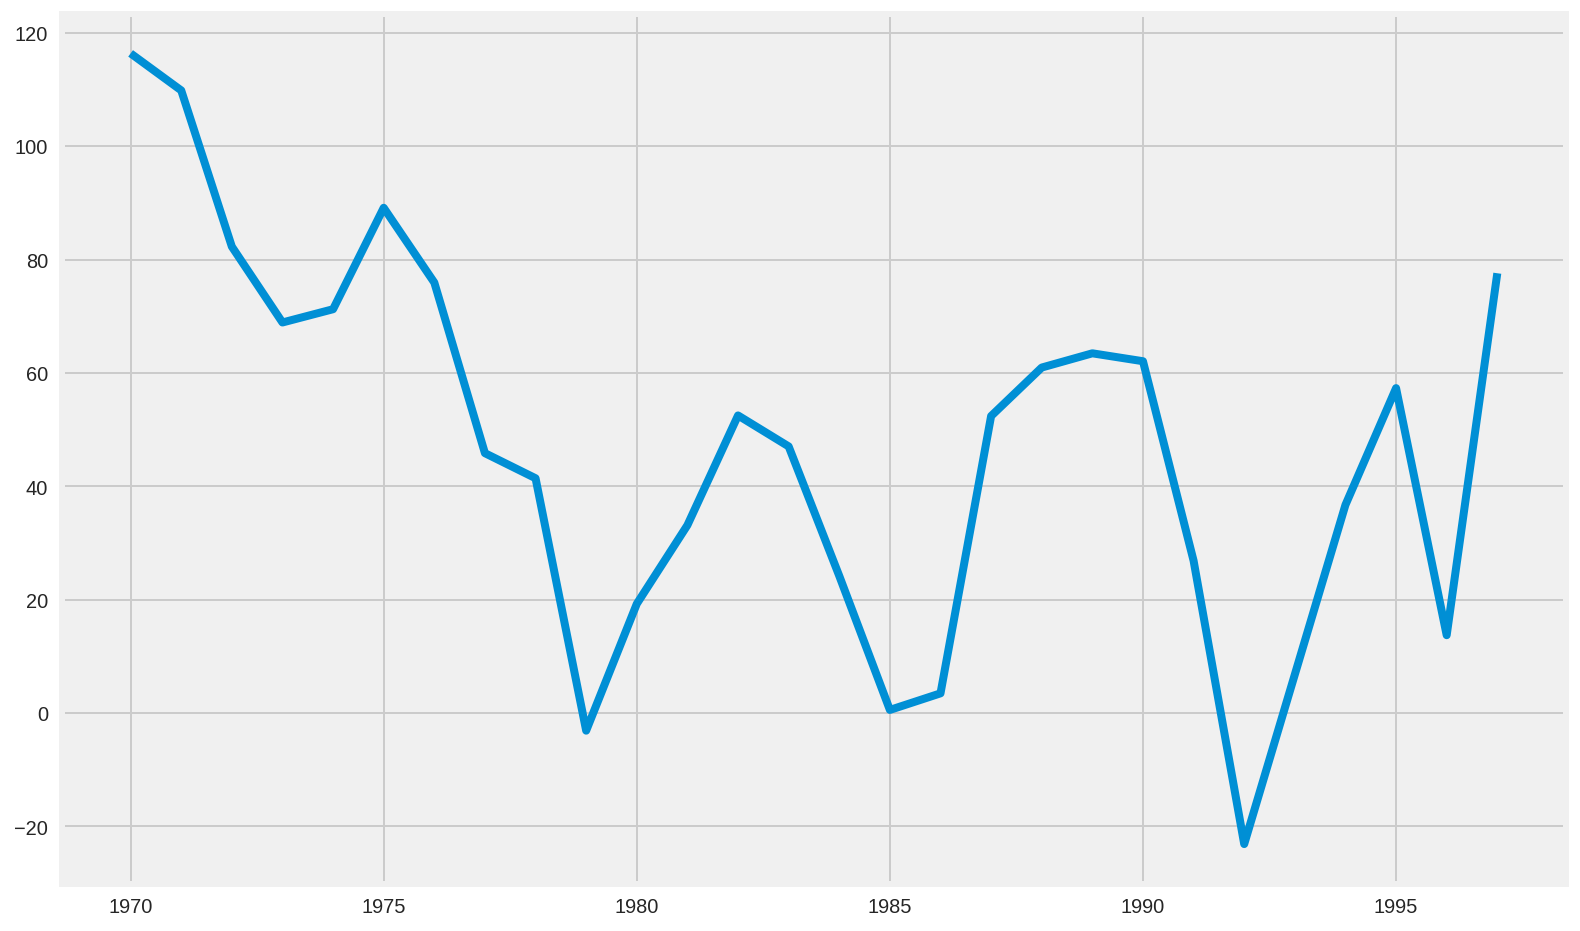

In [124]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(western_europe_final.iyear.values, float(start_western_europe['western_europe_intercept']) + \
                                         western_europe_final.iyear.values * float(start_western_europe['iyear_beta']) + \
                                         western_europe_final.attacktype1.values * float(start_western_europe['attacktype1_beta']) + \
                                         western_europe_final.nkill.values * float(start_western_europe['nkill_beta']) + \
                                         western_europe_final.nwound.values * float(start_western_europe['nwound_beta']));

### Eastern Europe

In [125]:
with pm.Model() as eastern_europe_reg:
    bombing_std = pm.Uniform('eastern_europe_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('eastern_europe_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + eastern_europe_final.iyear.values * iyear_beta +\
                                          eastern_europe_final.attacktype1.values * attacktype1_beta + \
                                         eastern_europe_final.nkill.values * nkill_beta +\
                                         eastern_europe_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = eastern_europe_final.bombing.values)
    

In [126]:
with eastern_europe_reg:
    eastern_europe_step = pm.NUTS()
    start_eastern_europe = pm.find_MAP()
    trace_eastern_europe = pm.sample(50000, step=eastern_europe_step, start=start_eastern_europe, njobs=4)

logp = -177.3, ||grad|| = 0.0011384: 100%|██████████| 32/32 [00:00<00:00, 1639.10it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, eastern_europe_intercept, eastern_europe_error_std_interval__]
100%|██████████| 50500/50500 [04:59<00:00, 168.65it/s]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.88107495263, but should be close to 0.8. Try to increase the number of tuning steps.


In [127]:
start_eastern_europe

{'attacktype1_beta': array(0.15674361394802913),
 'eastern_europe_error_std': array(50.238930595991214),
 'eastern_europe_error_std_interval__': array(-4.074671269872631),
 'eastern_europe_intercept': array(0.0005270541906102657),
 'iyear_beta': array(0.025507113652266343),
 'nkill_beta': array(-0.15679312127051576),
 'nwound_beta': array(-0.20915811215430832)}

In [128]:
eastern_europe_array = float(start_eastern_europe['eastern_europe_intercept']) + eastern_europe_final.iyear.values * float(start_eastern_europe['iyear_beta']) + \
                                         eastern_europe_final.attacktype1.values * float(start_eastern_europe['attacktype1_beta']) + \
                                         eastern_europe_final.nkill.values * float(start_eastern_europe['nkill_beta']) + \
                                         eastern_europe_final.nwound.values * float(start_eastern_europe['nwound_beta'])

In [129]:
eastern_europe_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
eastern_europe_df_bombing['year'] = eastern_europe_final.iyear
eastern_europe_df_bombing['map_bombing'] = eastern_europe_array
eastern_europe_df_bombing.tail()

,year,map_bombing
19,1992,11.433611
20,1994,48.344489
21,1995,24.013827
22,1996,5.882896
23,1997,10.914430


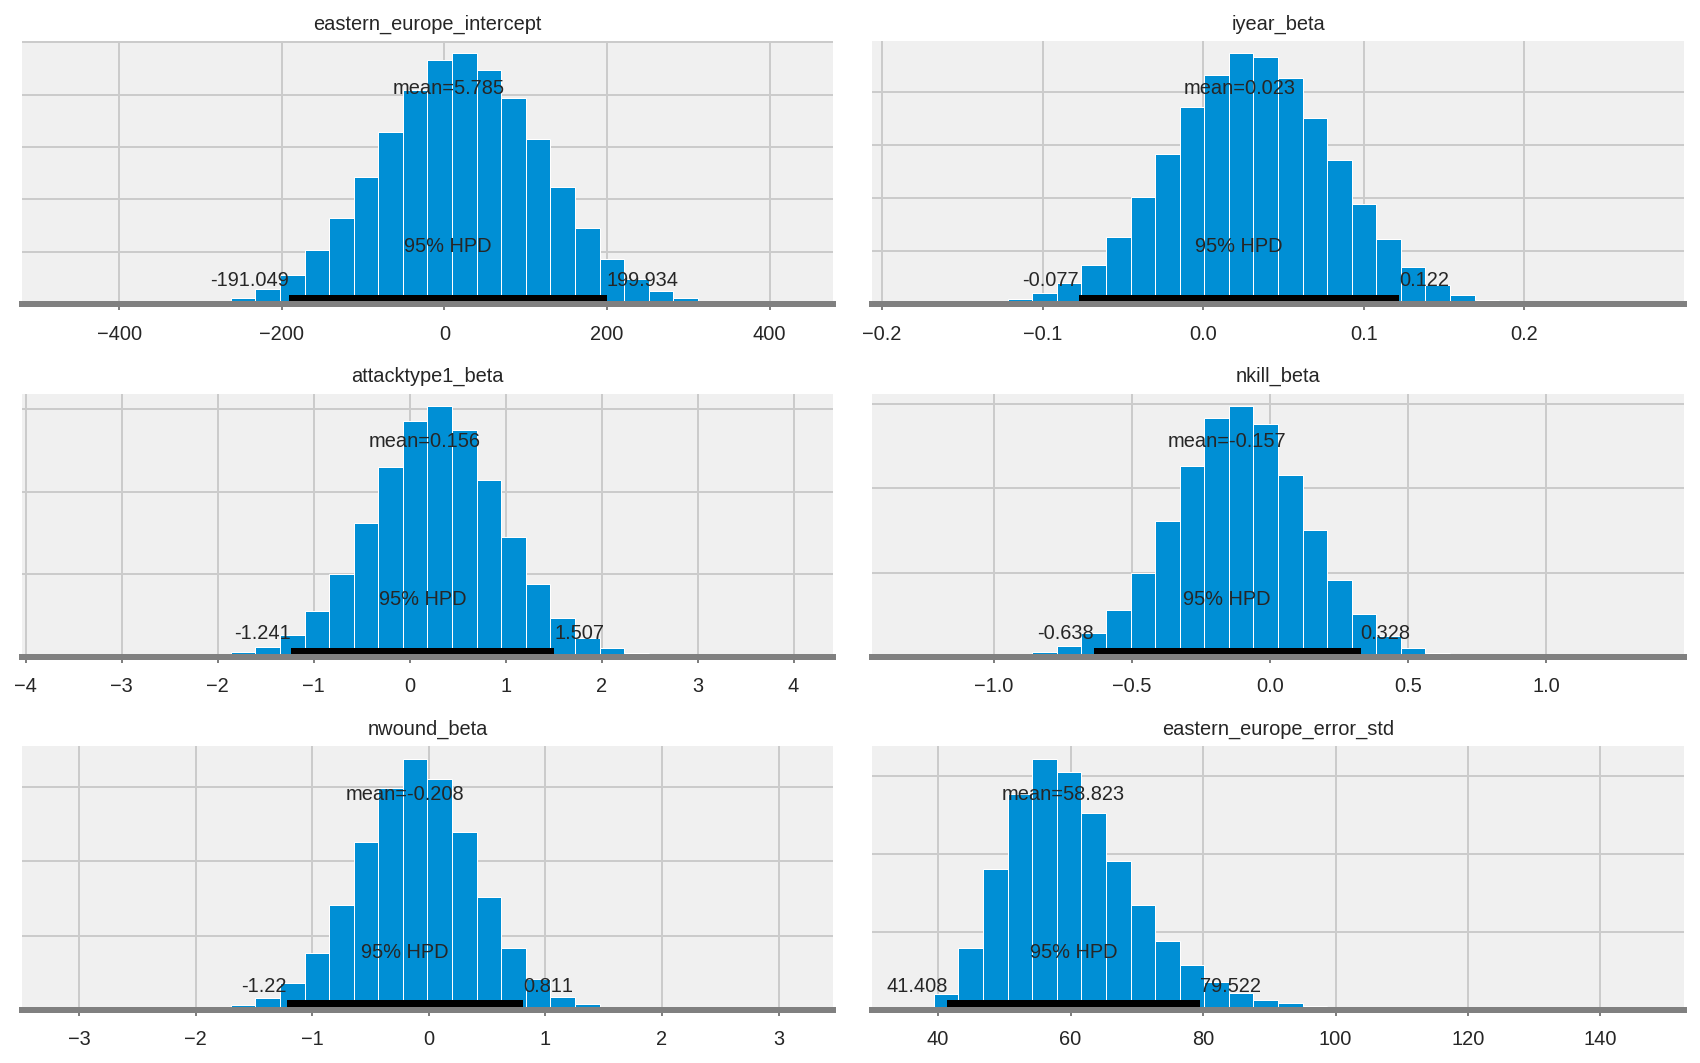

In [130]:
pm.plot_posterior(trace_eastern_europe);

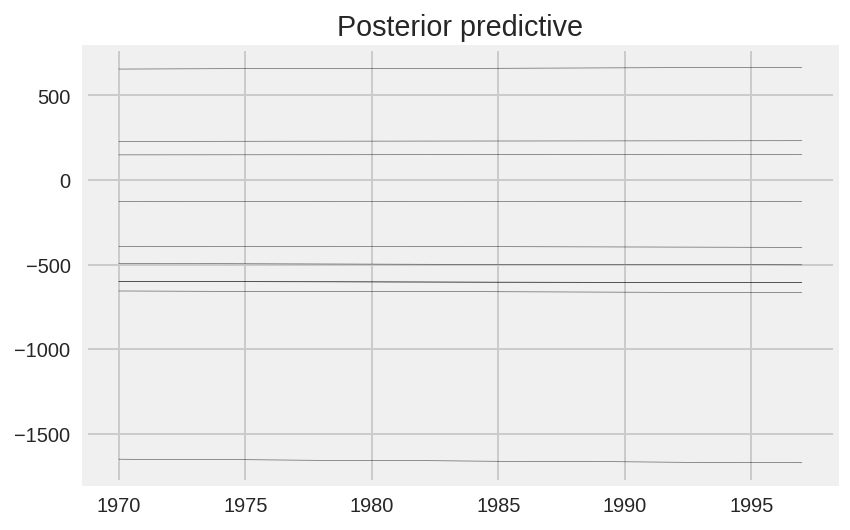

In [131]:
pm.plot_posterior_predictive_glm(trace_eastern_europe, samples = 10, lm = lambda x, sample: \
                                float(sample['eastern_europe_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = eastern_europe_final.iyear.values,\
                                label = 'posterior predictive regression lines');

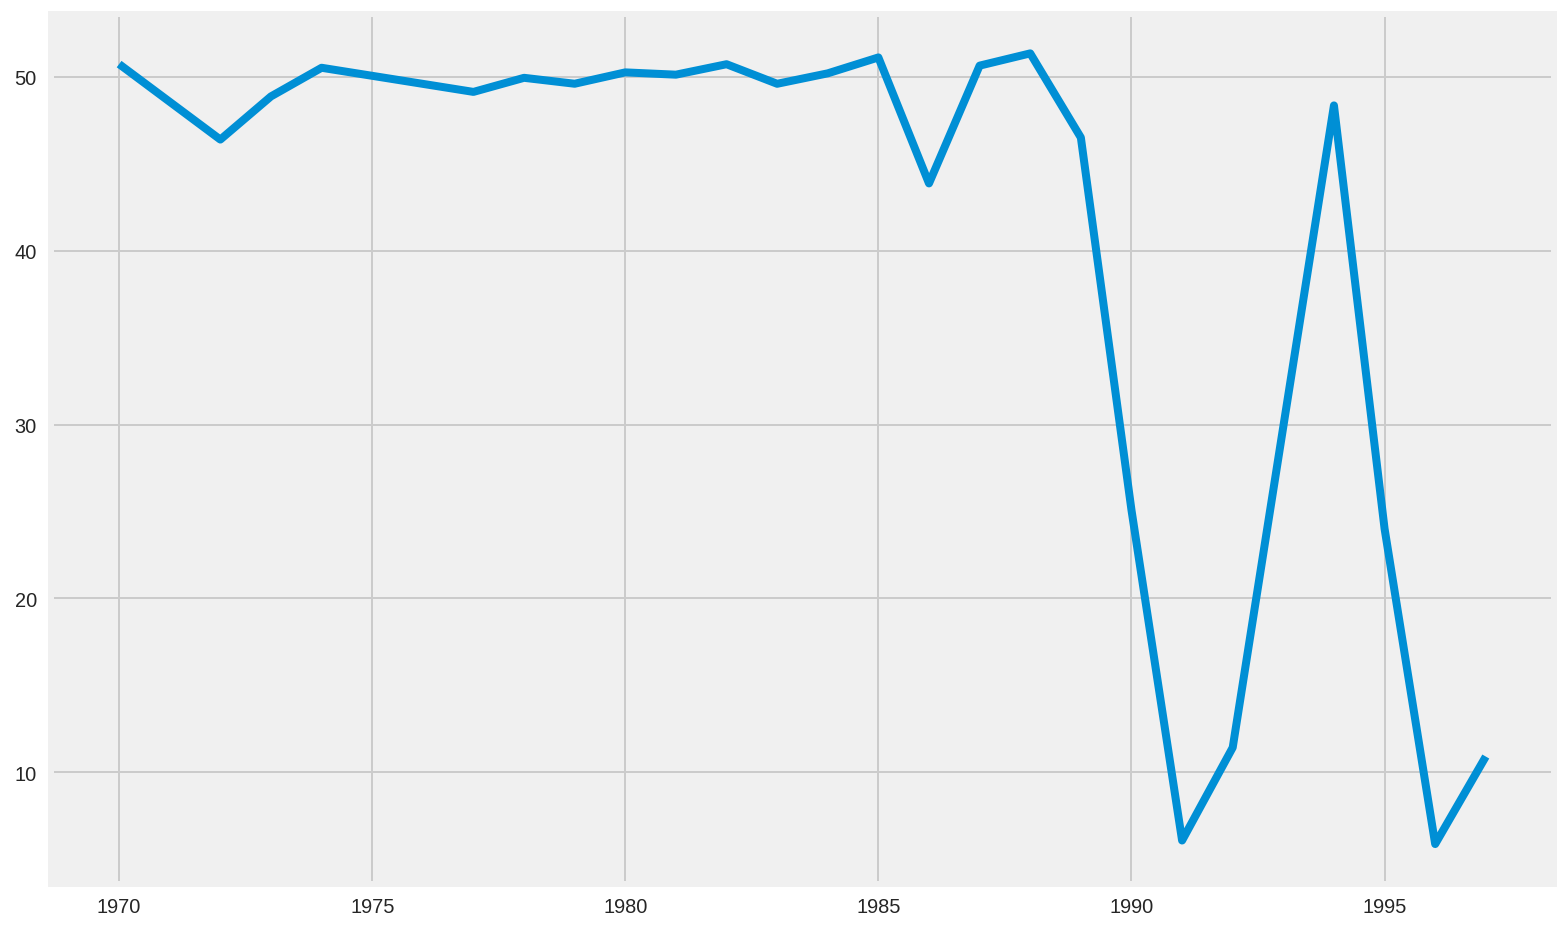

In [132]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(eastern_europe_final.iyear.values, float(start_eastern_europe['eastern_europe_intercept']) + \
                                         eastern_europe_final.iyear.values * float(start_eastern_europe['iyear_beta']) + \
                                         eastern_europe_final.attacktype1.values * float(start_eastern_europe['attacktype1_beta']) + \
                                         eastern_europe_final.nkill.values * float(start_eastern_europe['nkill_beta']) + \
                                         eastern_europe_final.nwound.values * float(start_eastern_europe['nwound_beta']));

### Middle East

In [133]:
with pm.Model() as middle_east_reg:
    bombing_std = pm.Uniform('middle_east_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('middle_east_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + middle_east_final.iyear.values * iyear_beta +\
                                          middle_east_final.attacktype1.values * attacktype1_beta + \
                                         middle_east_final.nkill.values * nkill_beta +\
                                         middle_east_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = middle_east_final.bombing.values)
    

In [134]:
with middle_east_reg:
    step = pm.NUTS()
    start_middle_east = pm.find_MAP()
    trace_middle_east = pm.sample(50000, step=step, start=start_middle_east, njobs=4)

logp = -190.73, ||grad|| = 18.607: 100%|██████████| 37/37 [00:00<00:00, 1642.98it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, middle_east_intercept, middle_east_error_std_interval__]
100%|██████████| 50500/50500 [06:13<00:00, 135.09it/s]
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [135]:
start_middle_east

{'attacktype1_beta': array(-0.06221096879112407),
 'iyear_beta': array(0.046320110194858245),
 'middle_east_error_std': array(45.65947520733356),
 'middle_east_error_std_interval__': array(-4.171798771414056),
 'middle_east_intercept': array(2.5687506206809014e-05),
 'nkill_beta': array(0.011304295725202874),
 'nwound_beta': array(-0.03448623377020066)}

In [136]:
middle_east_array = float(start_middle_east['middle_east_intercept']) + middle_east_final.iyear.values * float(start_middle_east['iyear_beta']) + \
                                         middle_east_final.attacktype1.values * float(start_middle_east['attacktype1_beta']) + \
                                         middle_east_final.nkill.values * float(start_middle_east['nkill_beta']) + \
                                         middle_east_final.nwound.values * float(start_middle_east['nwound_beta'])

In [137]:
middle_east_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
middle_east_df_bombing['year'] = middle_east_final.iyear
middle_east_df_bombing['map_bombing'] = middle_east_array
middle_east_df_bombing.tail()

,year,map_bombing
22,1992,-11.639427
23,1994,-10.485558
24,1995,-8.796211
25,1996,8.413681
26,1997,18.368605


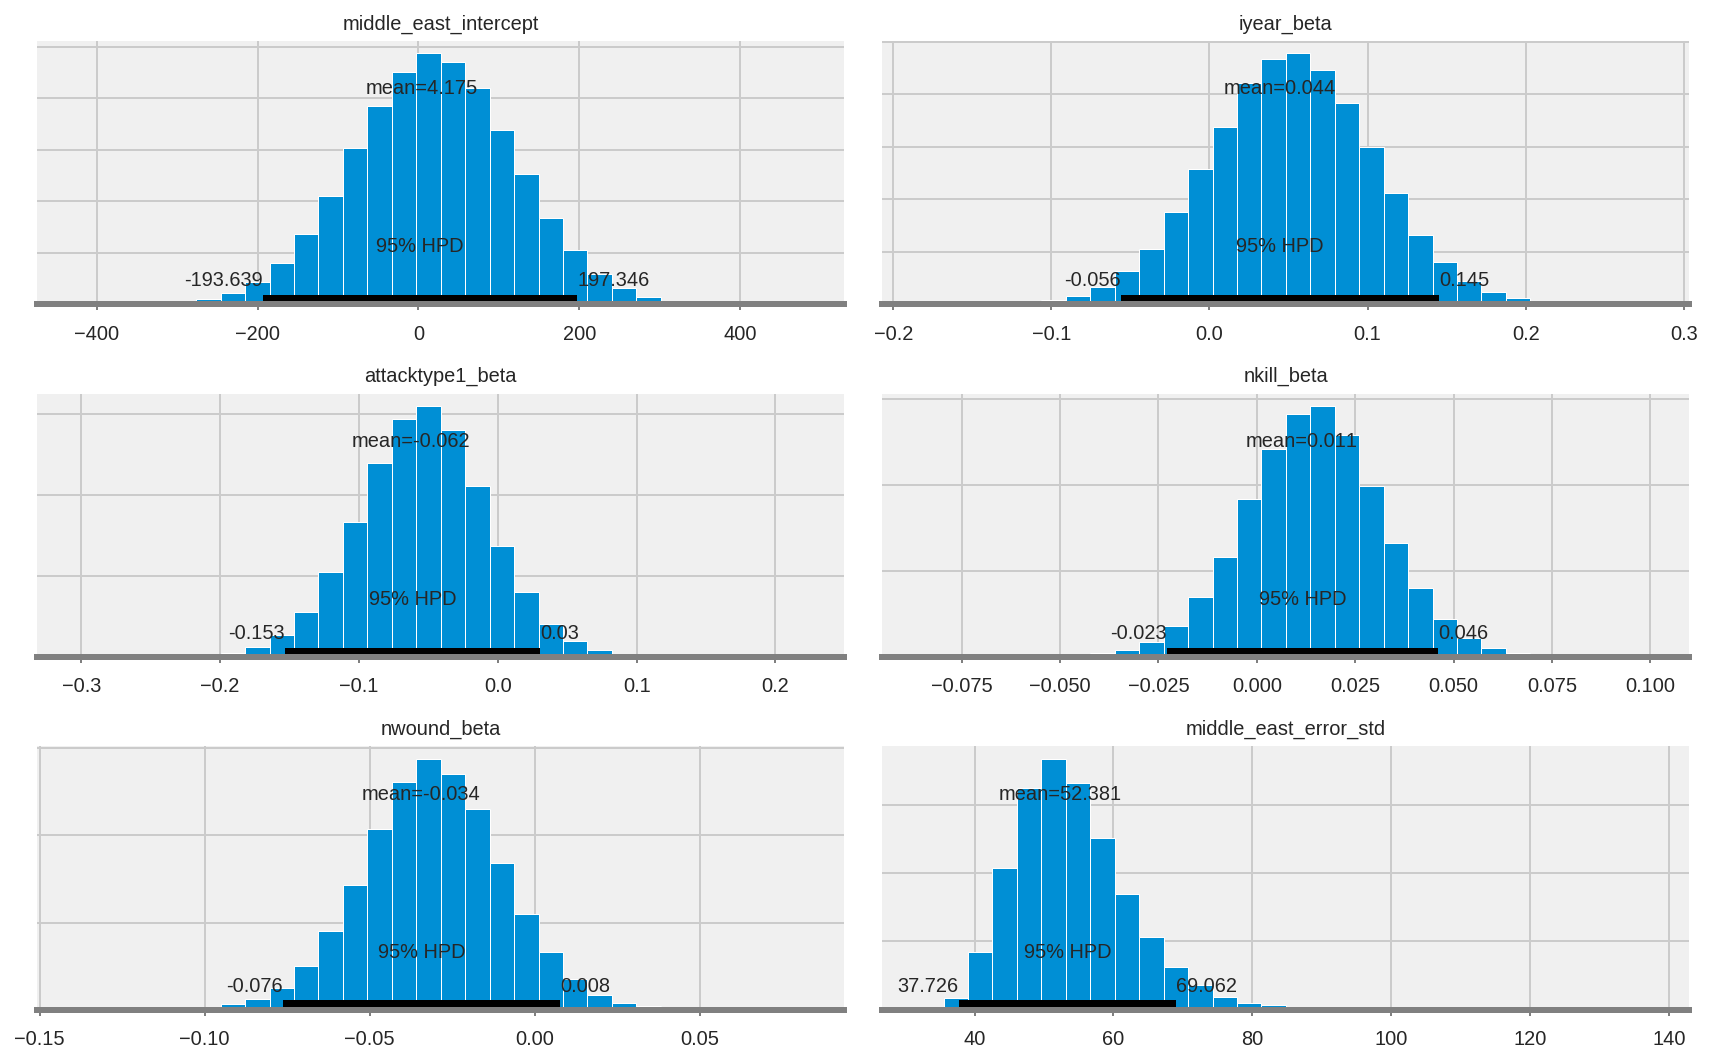

In [138]:
pm.plot_posterior(trace_middle_east);

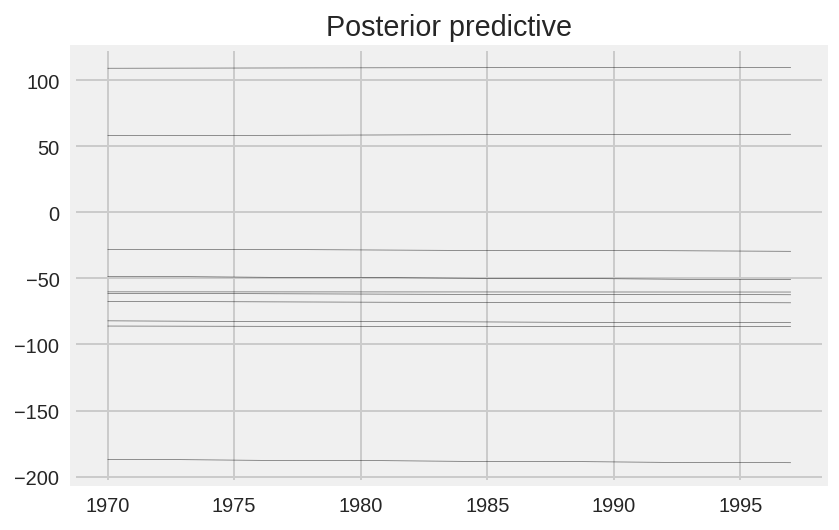

In [139]:
pm.plot_posterior_predictive_glm(trace_middle_east, samples = 10, lm = lambda x, sample: \
                                float(sample['middle_east_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = middle_east_final.iyear.values,\
                                label = 'posterior predictive regression lines');

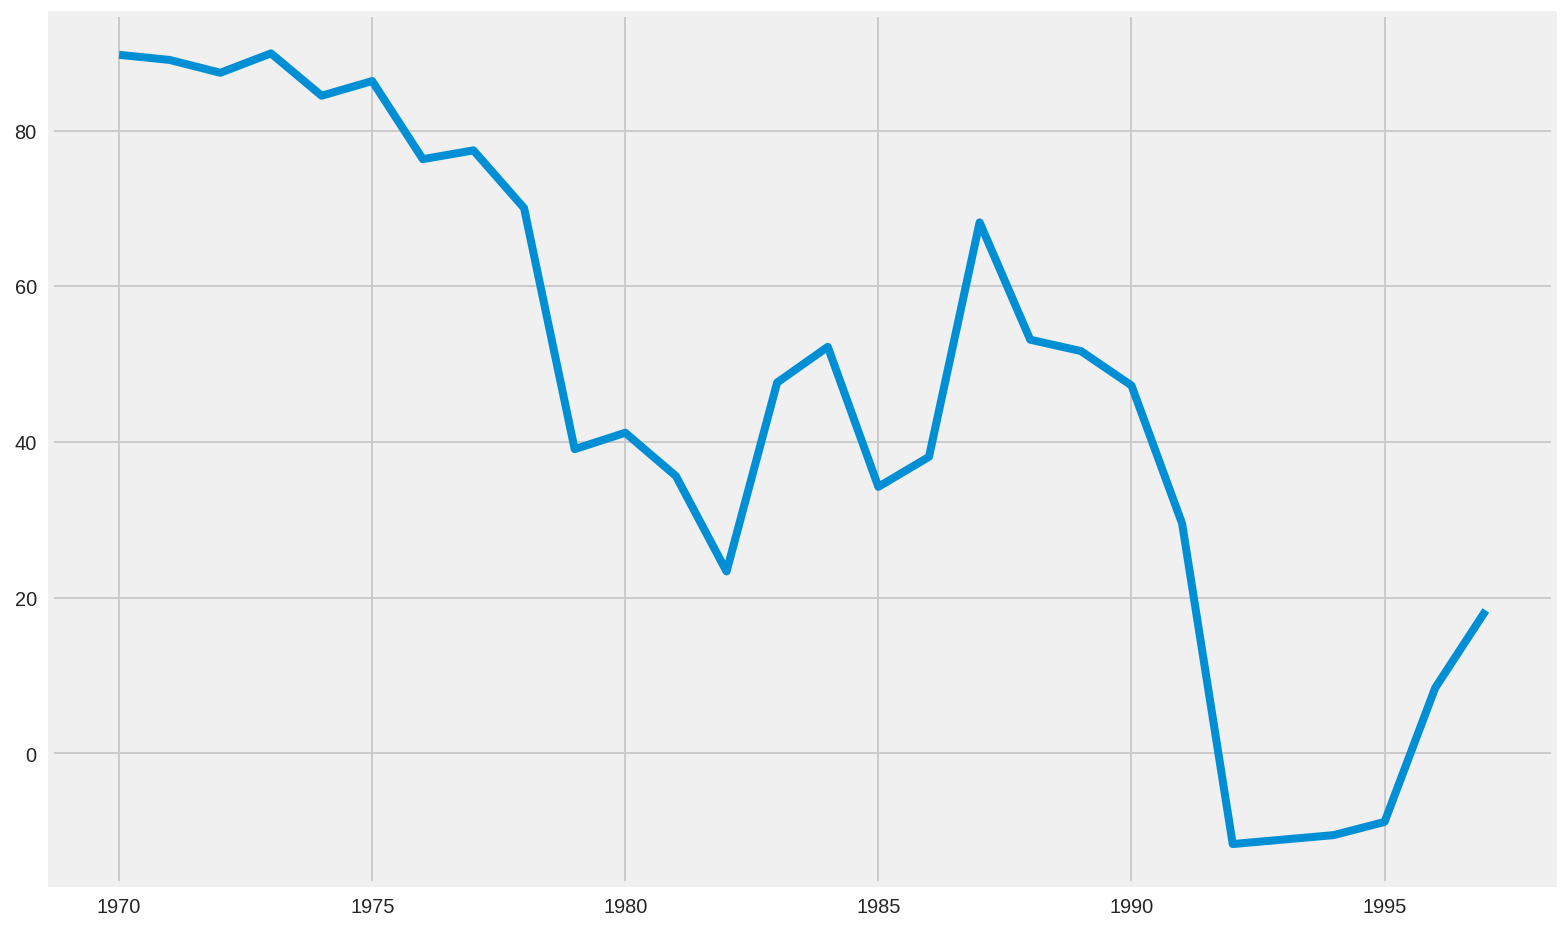

In [140]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(middle_east_final.iyear.values, float(start_middle_east['middle_east_intercept']) + \
                                         middle_east_final.iyear.values * float(start_middle_east['iyear_beta']) + \
                                         middle_east_final.attacktype1.values * float(start_middle_east['attacktype1_beta']) + \
                                         middle_east_final.nkill.values * float(start_middle_east['nkill_beta']) + \
                                         middle_east_final.nwound.values * float(start_middle_east['nwound_beta']));

### Sub Africa

In [141]:
with pm.Model() as sub_africa_reg:
    bombing_std = pm.Uniform('sub_africa_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('sub_africa_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + sub_africa_final.iyear.values * iyear_beta +\
                                          sub_africa_final.attacktype1.values * attacktype1_beta + \
                                         sub_africa_final.nkill.values * nkill_beta +\
                                         sub_africa_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = sub_africa_final.bombing.values)
    

In [142]:
with sub_africa_reg:
    step = pm.NUTS()
    start_sub_africa = pm.find_MAP()
    trace_sub_africa = pm.sample(50000, step=step, start=start_sub_africa, njobs=4)

logp = -186.21, ||grad|| = 10.061: 100%|██████████| 38/38 [00:00<00:00, 1712.77it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, sub_africa_intercept, sub_africa_error_std_interval__]
100%|██████████| 50500/50500 [07:38<00:00, 110.21it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.884584758779, but should be close to 0.8. Try to increase the number of tuning steps.


In [143]:
start_sub_africa

{'attacktype1_beta': array(-0.07214344497644747),
 'iyear_beta': array(0.041698688662309316),
 'nkill_beta': array(0.005102932922518751),
 'nwound_beta': array(-0.055218513385354134),
 'sub_africa_error_std': array(46.937145007659005),
 'sub_africa_error_std_interval__': array(-4.14376878182887),
 'sub_africa_intercept': array(3.605062134045017e-05)}

In [144]:
sub_africa_array = float(start_sub_africa['sub_africa_intercept']) + sub_africa_final.iyear.values * float(start_sub_africa['iyear_beta']) + \
                                         sub_africa_final.attacktype1.values * float(start_sub_africa['attacktype1_beta']) + \
                                         sub_africa_final.nkill.values * float(start_sub_africa['nkill_beta']) + \
                                         sub_africa_final.nwound.values * float(start_sub_africa['nwound_beta'])

In [145]:
sub_africa_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
sub_africa_df_bombing['year'] = sub_africa_final.iyear
sub_africa_df_bombing['map_bombing'] = sub_africa_array
sub_africa_df_bombing.tail()

,year,map_bombing
21,1992,-31.054636
22,1994,3.152606
23,1995,27.726608
24,1996,41.729793
25,1997,-2.444220


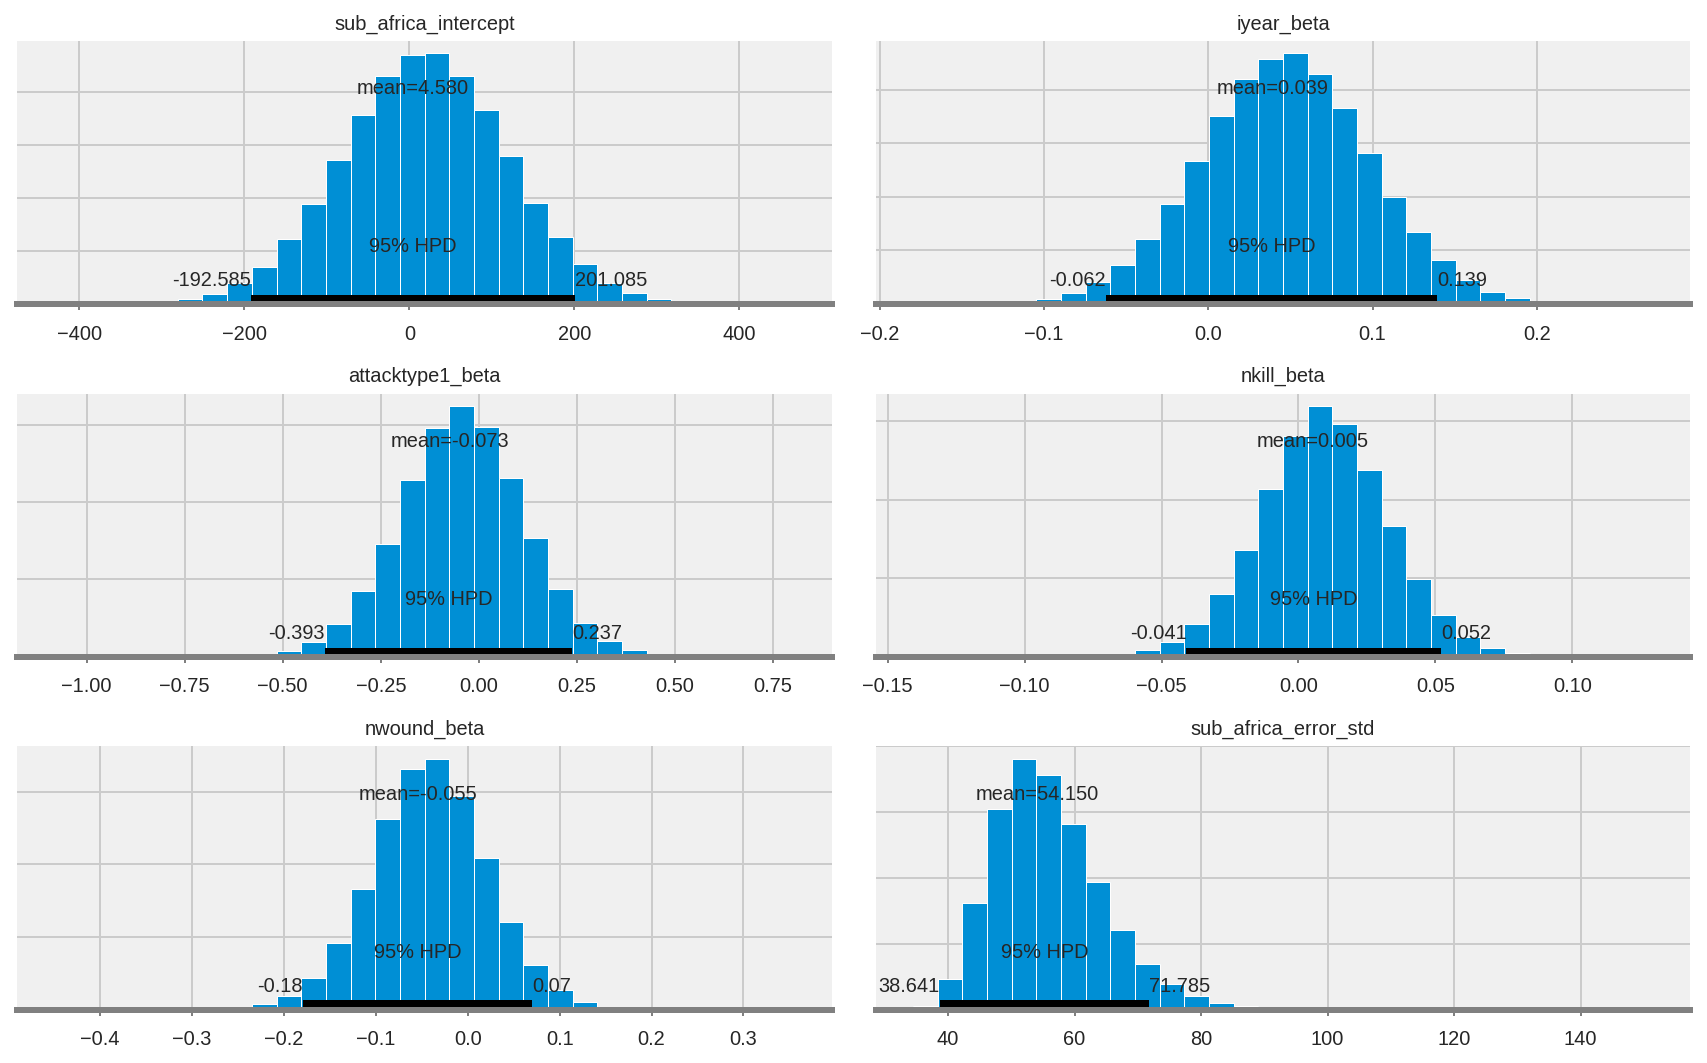

In [146]:
pm.plot_posterior(trace_sub_africa);

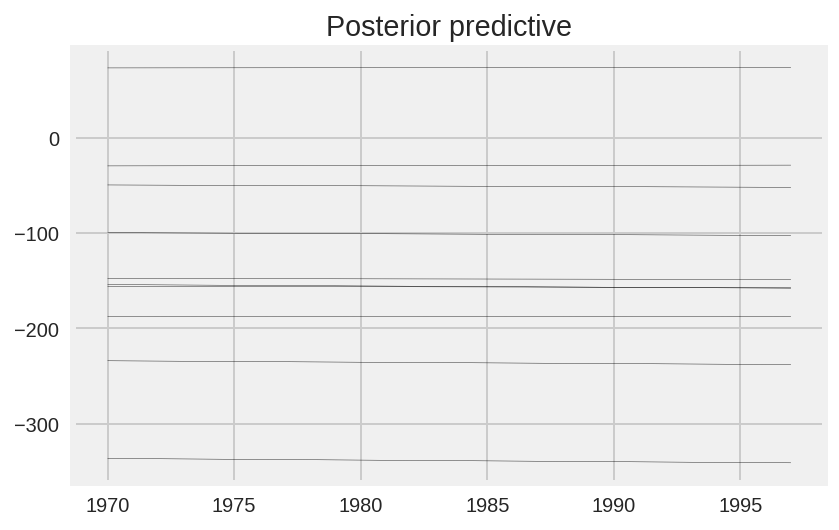

In [147]:
pm.plot_posterior_predictive_glm(trace_sub_africa, samples = 10, lm = lambda x, sample: \
                                float(sample['sub_africa_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = sub_africa_final.iyear.values,\
                                label = 'posterior predictive regression lines');

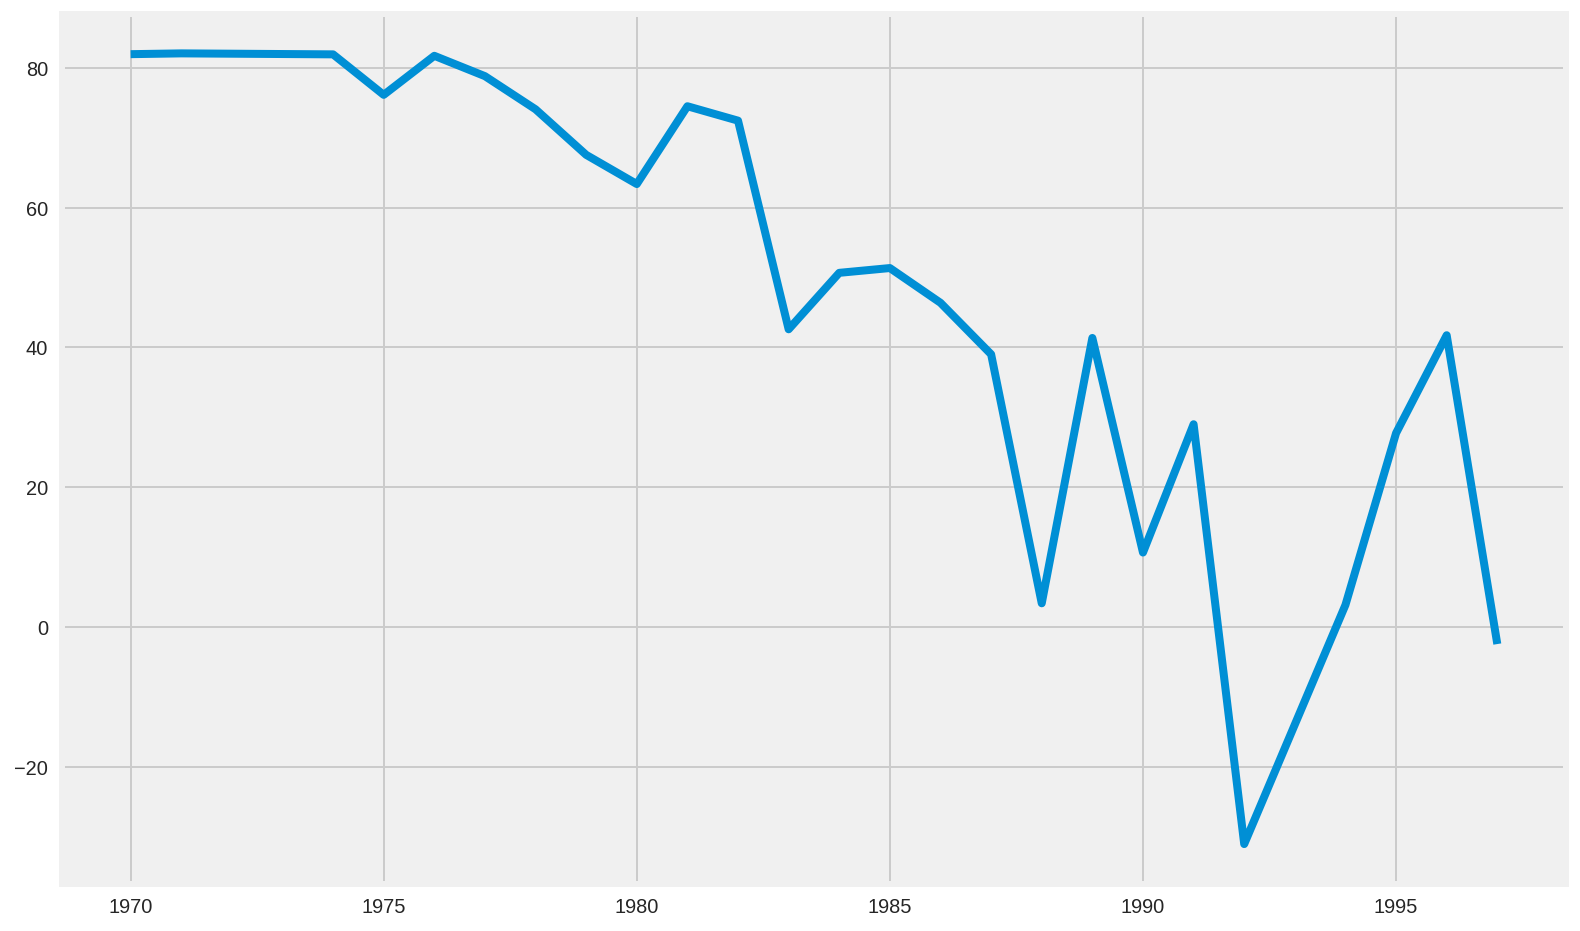

In [148]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(sub_africa_final.iyear.values, float(start_sub_africa['sub_africa_intercept']) + \
                                         sub_africa_final.iyear.values * float(start_sub_africa['iyear_beta']) + \
                                         sub_africa_final.attacktype1.values * float(start_sub_africa['attacktype1_beta']) + \
                                         sub_africa_final.nkill.values * float(start_sub_africa['nkill_beta']) + \
                                         sub_africa_final.nwound.values * float(start_sub_africa['nwound_beta']));

### Australasia

In [149]:
with pm.Model() as australasia_reg:
    bombing_std = pm.Uniform('australasia_error_std', lower = 0.0001, upper = total_df.bombing.var())
    
    intercept = pm.Normal('australasia_intercept', mu = 0, sd = 100)
    iyear_beta = pm.Normal('iyear_beta', mu = 0, sd = total_df.bombing.var())
    attacktype1_beta = pm.Normal('attacktype1_beta', mu = 0, sd = total_df.bombing.var())
    nkill_beta = pm.Normal('nkill_beta', mu = 0, sd = total_df.bombing.var())
    nwound_beta = pm.Normal('nwound_beta', mu = 0, sd = total_df.bombing.var())
    
    E_bombing = pm.Normal('y_mean', mu = (intercept + australasia_final.iyear.values * iyear_beta +\
                                          australasia_final.attacktype1.values * attacktype1_beta + \
                                         australasia_final.nkill.values * nkill_beta +\
                                         australasia_final.nwound.values * nwound_beta), sd = bombing_std, \
                         observed = australasia_final.bombing.values)
    

In [150]:
with australasia_reg:
    step = pm.NUTS()
    start_australasia = pm.find_MAP()
    trace_australasia = pm.sample(50000, step=step, start=start_australasia, njobs=4)

logp = -172.22, ||grad|| = 0.0093105: 100%|██████████| 63/63 [00:00<00:00, 1668.55it/s]       
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nwound_beta, nkill_beta, attacktype1_beta, iyear_beta, australasia_intercept, australasia_error_std_interval__]
100%|██████████| 50500/50500 [06:01<00:00, 139.62it/s]
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.880586190882, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


In [151]:
start_australasia

{'attacktype1_beta': array(-2.7121684339390866),
 'australasia_error_std': array(50.81040034789262),
 'australasia_error_std_interval__': array(-4.063167048903921),
 'australasia_intercept': array(0.008490051899776639),
 'iyear_beta': array(0.03634834488125742),
 'nkill_beta': array(0.26676308099204),
 'nwound_beta': array(-0.891409850241518)}

In [152]:
australasia_array = float(start_australasia['australasia_intercept']) + australasia_final.iyear.values * float(start_australasia['iyear_beta']) + \
                                         australasia_final.attacktype1.values * float(start_australasia['attacktype1_beta']) + \
                                         australasia_final.nkill.values * float(start_australasia['nkill_beta']) + \
                                         australasia_final.nwound.values * float(start_australasia['nwound_beta'])

In [153]:
australasia_df_bombing = pd.DataFrame(columns = ['year', 'map_bombing'])
australasia_df_bombing['year'] = australasia_final.iyear
australasia_df_bombing['map_bombing'] = australasia_array
australasia_df_bombing.tail()

,year,map_bombing
18,1992,16.228660
19,1994,9.544058
20,1995,16.466764
21,1996,14.684399
22,1997,33.108529


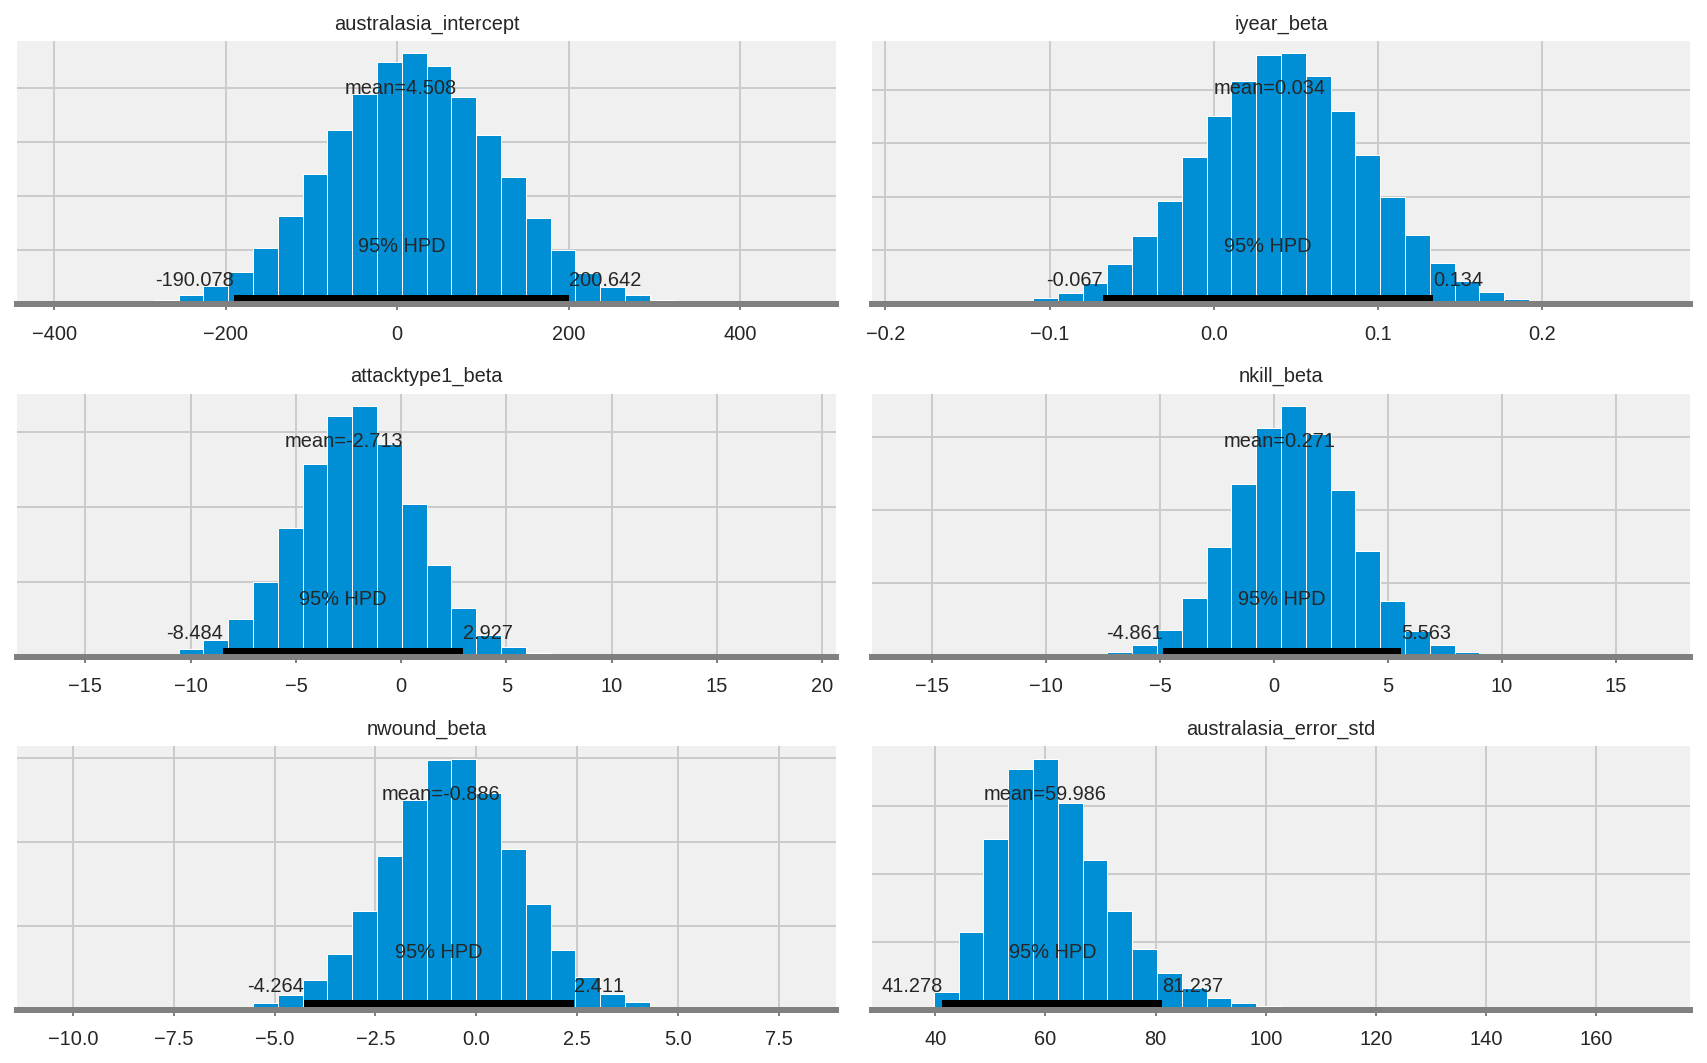

In [154]:
pm.plot_posterior(trace_australasia);

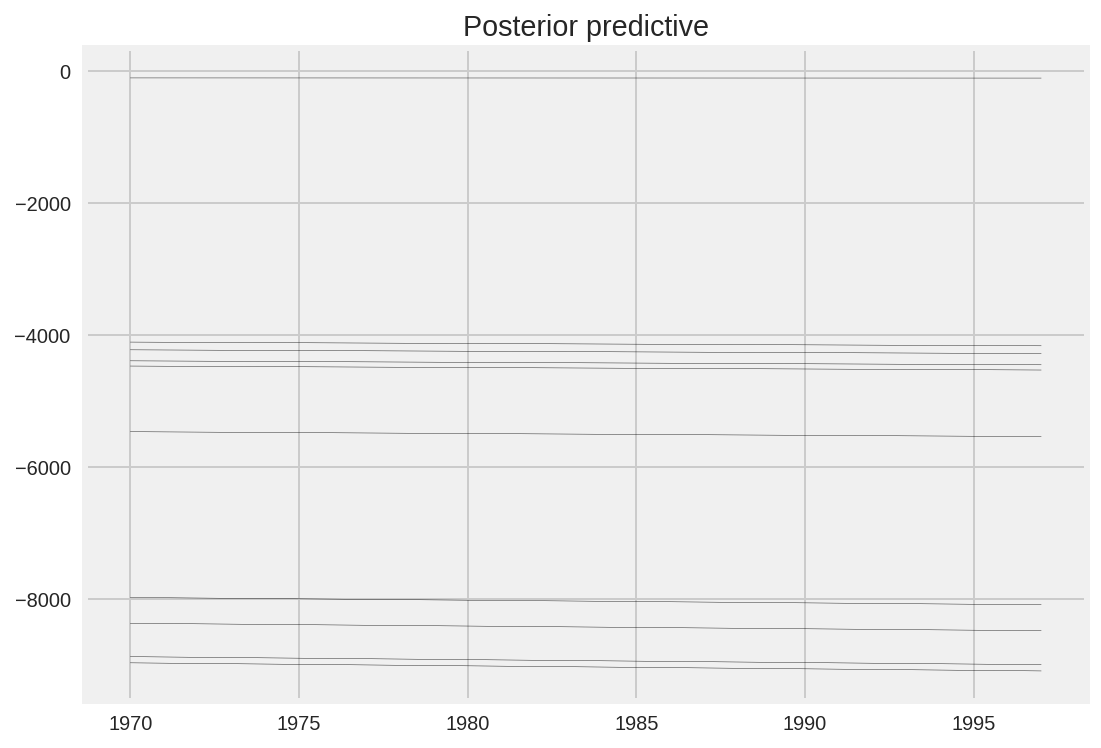

In [155]:
plt.figure(figsize = (8, 6))
pm.plot_posterior_predictive_glm(trace_australasia, samples = 10, lm = lambda x, sample: \
                                float(sample['australasia_intercept']) + x * float(sample['iyear_beta']) + \
                                         x * float(sample['attacktype1_beta']) + \
                                         x * float(sample['nkill_beta']) + \
                                         x * float(sample['nwound_beta']), eval = australasia_final.iyear.values,\
                                label = 'posterior predictive regression lines');

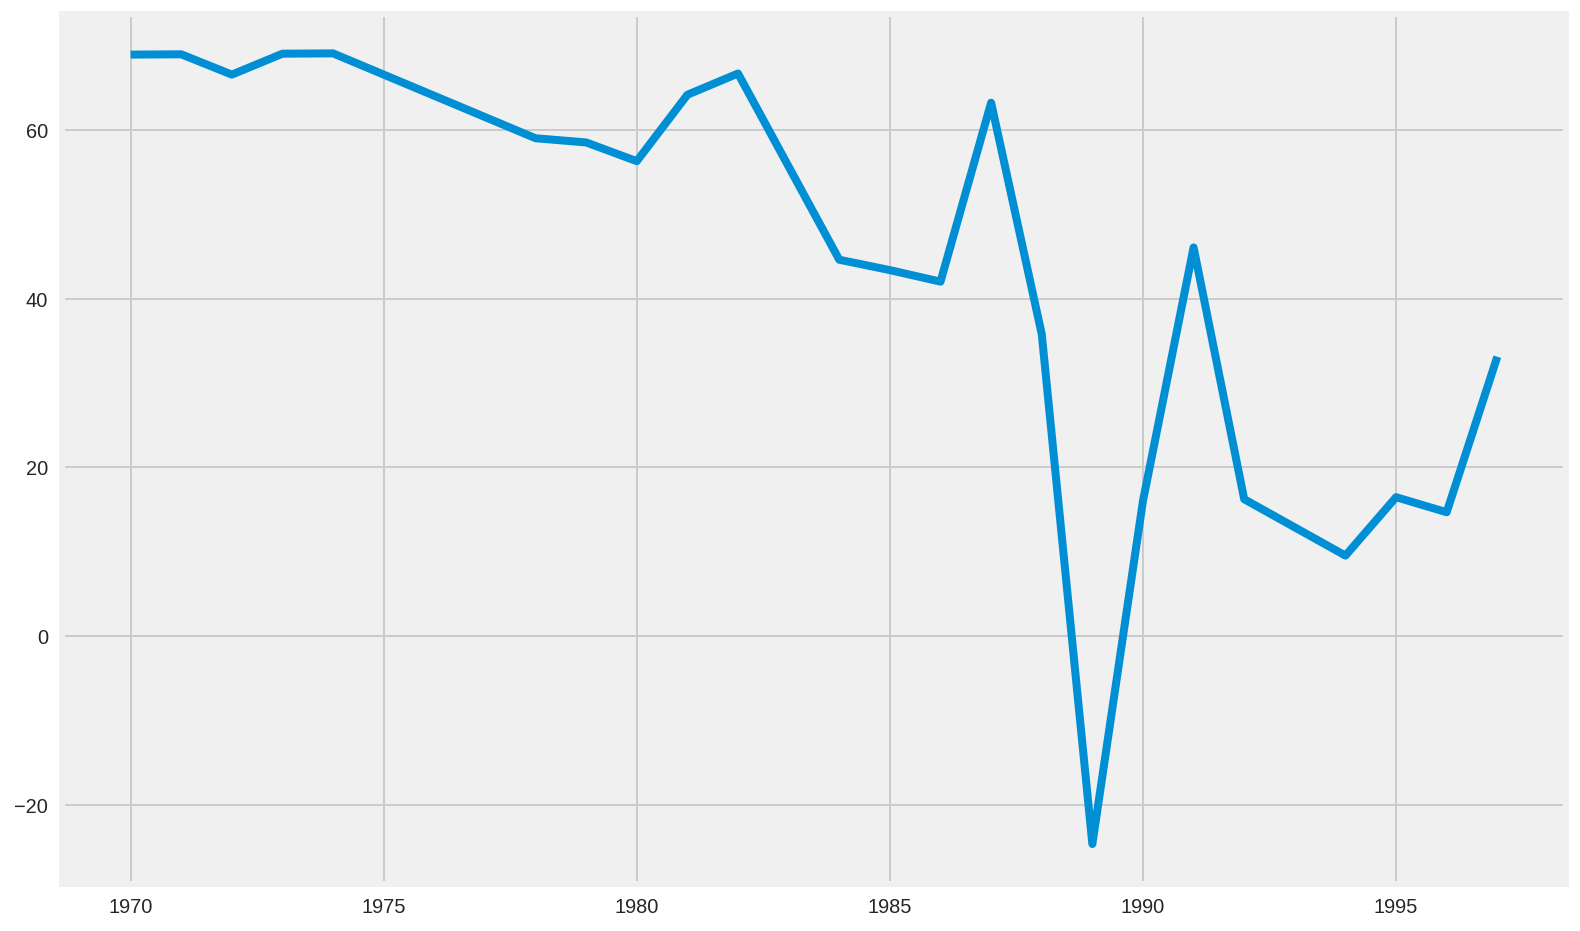

In [156]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.plot(australasia_final.iyear.values, float(start_australasia['australasia_intercept']) + \
                                         australasia_final.iyear.values * float(start_australasia['iyear_beta']) + \
                                         australasia_final.attacktype1.values * float(start_australasia['attacktype1_beta']) + \
                                         australasia_final.nkill.values * float(start_australasia['nkill_beta']) + \
                                         australasia_final.nwound.values * float(start_australasia['nwound_beta']));

## Predict Bombings

In [157]:
north_america_bombing_93 = (north_america_df_bombing.query("year == 1992")['map_bombing'].values + north_america_df_bombing.query("year == 1994")['map_bombing'].values)/2
central_america_bombing_93 = (central_america_df_bombing.query("year == 1992")['map_bombing'].values + central_america_df_bombing.query("year == 1994")['map_bombing'].values)/2
south_america_bombing_93 = (south_america_df_bombing.query("year == 1992")['map_bombing'].values + south_america_df_bombing.query("year == 1994")['map_bombing'].values)/2
east_asia_bombing_93 = (east_asia_df_bombing.query("year == 1992")['map_bombing'].values + east_asia_df_bombing.query("year == 1994")['map_bombing'].values)/2
southeast_asia_bombing_93 = (southeast_asia_df_bombing.query("year == 1992")['map_bombing'].values + southeast_asia_df_bombing.query("year == 1994")['map_bombing'].values)/2
south_asia_bombing_93 = (south_asia_df_bombing.query("year == 1992")['map_bombing'].values + south_asia_df_bombing.query("year == 1994")['map_bombing'].values)/2
central_asia_bombing_93 = (central_asia_df_bombing.query("year == 1992")['map_bombing'].values + central_asia_df_bombing.query("year == 1994")['map_bombing'].values)/2
western_europe_bombing_93 = (western_europe_df_bombing.query("year == 1992")['map_bombing'].values + western_europe_df_bombing.query("year == 1994")['map_bombing'].values)/2
eastern_europe_bombing_93 = (eastern_europe_df_bombing.query("year == 1992")['map_bombing'].values + eastern_europe_df_bombing.query("year == 1994")['map_bombing'].values)/2
middle_east_bombing_93 = (middle_east_df_bombing.query("year == 1992")['map_bombing'].values + middle_east_df_bombing.query("year == 1994")['map_bombing'].values)/2
sub_africa_bombing_93 = (sub_africa_df_bombing.query("year == 1992")['map_bombing'].values + sub_africa_df_bombing.query("year == 1994")['map_bombing'].values)/2
australasia_bombing_93 = (australasia_df_bombing.query("year == 1992")['map_bombing'].values + australasia_df_bombing.query("year == 1994")['map_bombing'].values)/2

In [159]:
bombings_93 = pd.DataFrame(columns = ['Region', 'Bombings/Explosives'])
bombings_93['Region'] = cont

In [160]:
bombings_93['Bombings/Explosives'] = [north_america_bombing_93[0], central_america_bombing_93[0],south_america_bombing_93[0],east_asia_bombing_93[0],southeast_asia_bombing_93[0],\
 south_asia_bombing_93[0],central_asia_bombing_93[0],western_europe_bombing_93[0],eastern_europe_bombing_93[0],middle_east_bombing_93[0],\
sub_africa_bombing_93[0], australasia_bombing_93[0]]

In [161]:
bombings_93['Bombings/Explosives'] = bombings_93['Bombings/Explosives'].apply(lambda x: 0 if x < 0 else x)

In [162]:
bombings_93

,Region,Bombings/Explosives
0,north_america,33.777770
1,central_america,57.206032
2,south_america,17.418140
3,east_asia,11.715807
4,southeast_asia,7.839075
5,south_asia,25.592903
6,central_asia,12.290284
7,western_europe,6.820312
8,eastern_europe,29.889050
9,middle_east,0.000000


#### Total Number of Bombings in 1993

In [163]:
bombings_93['Bombings/Explosives'].sum()

215.43573214254934

In [164]:
combined_93.groupby('region').agg({'Number of Incidents': sum}).reset_index()

,region,Number of Incidents
0,1,52.0
1,2,295.0
2,3,773.0
3,4,79.0
4,5,510.0
5,6,447.0
6,7,69.0
7,8,708.0
8,9,67.0
9,10,1222.0
